In [ ]:
import pandas as pd

from pprint import pprint

from googleapiclient.discovery import build

import configparser

import os

In [ ]:
config = configparser.ConfigParser()
config.read_file(open('Test.cfg'))
print(config['My Section Header']['MyPassword'])

OurSecretPassword


In [ ]:
os.environ["Our Secret Password in OS"] = config['My Section Header']['MyPassword']
print(os.environ["Our Secret Password in OS"])

OurSecretPassword


In [ ]:
env_var = os.environ
pprint(dict(env_var))

{'CGROUP_MEMORY_EVENTS': '/sys/fs/cgroup/memory.events '
                         '/var/colab/cgroup/jupyter-children/memory.events',
 'CLICOLOR': '1',
 'CLOUDSDK_CONFIG': '/content/.config',
 'CLOUDSDK_PYTHON': 'python3',
 'COLAB_BACKEND_VERSION': 'next',
 'COLAB_DEBUG_ADAPTER_MUX_PATH': '/usr/local/bin/dap_multiplexer',
 'COLAB_FILE_HANDLER_ADDR': 'localhost:3453',
 'COLAB_GPU': '',
 'COLAB_IMAGE_TYPE': 'cpu',
 'COLAB_JUPYTER_IP': '172.28.0.12',
 'COLAB_JUPYTER_TOKEN': '',
 'COLAB_JUPYTER_TRANSPORT': 'ipc',
 'COLAB_KERNEL_MANAGER_PROXY_HOST': '172.28.0.12',
 'COLAB_KERNEL_MANAGER_PROXY_PORT': '6000',
 'COLAB_LANGUAGE_SERVER_PROXY': '/usr/colab/bin/language_service',
 'COLAB_LANGUAGE_SERVER_PROXY_LSP_DIRS': '/datalab/web/pyright/typeshed-fallback/stdlib,/usr/local/lib/python3.10/dist-packages',
 'COLAB_LANGUAGE_SERVER_PROXY_REQUEST_TIMEOUT': '30s',
 'COLAB_LANGUAGE_SERVER_PROXY_ROOT_URL': 'http://172.28.0.1:8013/',
 'COLAB_NOTEBOOK_ID': '1M5tEDKSa0-d5O7CBip547k38NQ_E0G46',
 'COLAB_REL

In [ ]:
# load API key into Colab
config = configparser.ConfigParser()
config.read_file(open('YoutubeAPI.cfg'))

os.environ["Youtube_API_Access_KEY"]= config['Youtube API']['API_KEY']

In [ ]:
# this is just one of the easiest ways to connect to Youtube API
youtube = build( 'youtube', 'v3', developerKey = os.environ["Youtube_API_Access_KEY"] )

In [ ]:
# Video ID
V_ID = 'PHe0bXAIuk0'

response = youtube.commentThreads().list(
            part="id, snippet, replies",
            order="time",
            videoId=V_ID,
            maxResults = 5
        ).execute()

In [ ]:
pprint(response)

{'etag': 'RsD5nCYqCh2pV2zF7gdDcHr8lFA',
 'items': [{'etag': 'xbUhKxUQMdm3bZmBY_HqAJABm98',
            'id': 'UgwDepNmrXX6kIXq5f94AaABAg',
            'kind': 'youtube#commentThread',
            'snippet': {'canReply': True,
                        'channelId': 'UCqvaXJ1K3HheTPNjH-KpwXQ',
                        'isPublic': True,
                        'topLevelComment': {'etag': 'abYJf8SQM8Rur4AKy-evEn1kbBg',
                                            'id': 'UgwDepNmrXX6kIXq5f94AaABAg',
                                            'kind': 'youtube#comment',
                                            'snippet': {'authorChannelId': {'value': 'UCAy6wjxaOYfvhMSD0q52nWw'},
                                                        'authorChannelUrl': 'http://www.youtube.com/@AkashThiyagalingam',
                                                        'authorDisplayName': '@AkashThiyagalingam',
                                                        'authorProfileImageUrl': 'https://yt3.ggp

In [ ]:
# create some empty lists to store the data we need

Original_list = []
Original_AccountID = []
Original_CommentID = []

Reply_list = []
Reply_AccountID = []
Reply_CommentID = []
Reply_Original_CommentID = []

In [ ]:
V_ID = 'PHe0bXAIuk0'
# V_ID = 'jCZtuA8Apbk'

response = youtube.commentThreads().list(
            part="id, snippet, replies",
            order="time",
            videoId=V_ID,
            maxResults = 100
        ).execute()


for i in range(len(response['items'])):

      if response['items'][i]['snippet']['topLevelComment']['snippet'].get('authorChannelId') is not None:
        Original_list.append(response['items'][i]['snippet']['topLevelComment']['snippet']['textOriginal'].replace("\n", ";").replace("\t", "").replace("-", "").replace("      ", ""))
        Original_AccountID.append(response['items'][i]['snippet']['topLevelComment']['snippet']['authorChannelId']['value'])
        Original_CommentID.append(response['items'][i]['id'])

      if len(Original_list) > len(Original_AccountID):
          Original_AccountID.append("No entry")
          print("surprise: ", i)

      if len(Original_list) > len(Original_CommentID):
          Original_CommentID.append("No entry")
          print("surprise: ", i)

      if response['items'][i]['snippet']['totalReplyCount'] > 0:

          replies_response = youtube.comments().list( part='snippet', maxResults=100, parentId=response['items'][i]['id'] ).execute()

          for j in range(len(replies_response['items'])):

                Reply_list.append(replies_response['items'][j]['snippet']['textOriginal'].replace("\n", ";").replace("\t", "").replace("-", "").replace("      ", ""))
                Reply_AccountID.append(replies_response['items'][j]['snippet']['authorChannelId']['value'])
                Reply_Original_CommentID.append(response['items'][i]['id'])
                Reply_CommentID.append(replies_response['items'][j]['id'])


          try:
              PageToken_replies = replies_response['nextPageToken']
          except Exception:
              PageToken_replies = None


          while (PageToken_replies):
              try:
                replies_response_next = youtube.comments().list( part='snippet', maxResults=100, parentId=response['items'][i]['id'], pageToken=PageToken_replies).execute()

                for k in range(len(replies_response_next['items'])):

                    Reply_list.append(replies_response_next['items'][k]['snippet']['textOriginal'].replace("\n", ";").replace("\t", "").replace("-", "").replace("      ", ""))
                    Reply_AccountID.append(replies_response_next['items'][k]['snippet']['authorChannelId']['value'])
                    Reply_Original_CommentID.append(response['items'][i]['id'])
                    Reply_CommentID.append(replies_response_next['items'][k]['id'])

                PageToken_replies = replies_response_next['nextPageToken']

              except Exception:
                  PageToken_replies = None


try:
    nextPageToken = response['nextPageToken']
except Exception:
    nextPageToken = None


while (nextPageToken):
    try:
        response = youtube.commentThreads().list(
                part="id, snippet, replies",
                order="time",
                pageToken=nextPageToken,
                videoId=V_ID,
                maxResults = 100
            ).execute()


        for i in range(len(response['items'])):


          if response['items'][i]['snippet']['topLevelComment']['snippet'].get('authorChannelId') is not None:
              Original_list.append(response['items'][i]['snippet']['topLevelComment']['snippet']['textOriginal'].replace("\n", ";").replace("\t", "").replace("-", "").replace("      ", ""))
              Original_AccountID.append(response['items'][i]['snippet']['topLevelComment']['snippet']['authorChannelId']['value'])
              Original_CommentID.append(response['items'][i]['id'])

          if len(Original_list) > len(Original_AccountID):
              Original_AccountID.append("No entry")
              print("surprise: ", i)

          if len(Original_list) > len(Original_CommentID):
              Original_CommentID.append("No entry")
              print("surprise: ", i)


          if response['items'][i]['snippet']['totalReplyCount'] > 0:
              replies_response = youtube.comments().list( part='snippet', maxResults=100, parentId=response['items'][i]['id'] ).execute()

              for j in range(len(replies_response['items'])):

                  Reply_list.append(replies_response['items'][j]['snippet']['textOriginal'].replace("\n", ";").replace("\t", "").replace("-", "").replace("      ", ""))
                  Reply_AccountID.append(replies_response['items'][j]['snippet']['authorChannelId']['value'])
                  Reply_Original_CommentID.append(response['items'][i]['id'])
                  Reply_CommentID.append(replies_response['items'][j]['id'])


              try:
                  PageToken_replies = replies_response['nextPageToken']
              except Exception:
                  PageToken_replies = None


              while (PageToken_replies):
                try:
                  replies_response_next = youtube.comments().list( part='snippet', maxResults=100, parentId=response['items'][i]['id'], pageToken=PageToken_replies).execute()

                  for k in range(len(replies_response_next['items'])):

                      Reply_list.append(replies_response_next['items'][k]['snippet']['textOriginal'].replace("\n", ";").replace("\t", "").replace("-", "").replace("      ", ""))
                      Reply_AccountID.append(replies_response_next['items'][k]['snippet']['authorChannelId']['value'])
                      Reply_Original_CommentID.append(response['items'][i]['id'])
                      Reply_CommentID.append(replies_response_next['items'][k]['id'])


                  PageToken_replies = replies_response_next['nextPageToken']

                except Exception:
                    PageToken_replies = None


        nextPageToken = response['nextPageToken']

    except Exception:
        print("looping has reached the end")


        break

looping has reached the end


In [ ]:
print("Original_list:", len(Original_list))
print("Original_AccountID:", len(Original_AccountID))
print("Original_CommentID:", len(Original_CommentID))

print("Reply_list:", len(Reply_list))
print("Reply_AccountID:", len(Reply_AccountID))
print("Reply_CommentID:", len(Reply_CommentID))
print("Reply_Original_CommentID:", len(Reply_Original_CommentID))

print("Total count of Comments and Replies:", len(Original_list)+len(Reply_list) )

Original_list: 16039
Original_AccountID: 16039
Original_CommentID: 16039
Reply_list: 10633
Reply_AccountID: 10633
Reply_CommentID: 10633
Reply_Original_CommentID: 10633
Total count of Comments and Replies: 26672


In [ ]:
df_original_comments = pd.DataFrame(Original_list, columns=['Youtube Comments'])
df_original_comments['Video ID'] = V_ID
df_original_comments['Channel ID'] = Original_AccountID
df_original_comments['Comment ID'] = Original_CommentID

df_original_order = df_original_comments[['Video ID',	'Channel ID', 'Comment ID', 'Youtube Comments']]


df_reply_comments = pd.DataFrame(Reply_list, columns=['Replies to Comments'])
df_reply_comments['Video ID'] = V_ID
df_reply_comments['Channel ID'] = Reply_AccountID
df_reply_comments['Comment ID'] = Reply_Original_CommentID
df_reply_comments['Reply ID'] = Reply_CommentID

df_reply_order = df_reply_comments[['Video ID',	'Channel ID', 'Comment ID', 'Reply ID', 'Replies to Comments']]

In [ ]:
df_original_order

,Video ID,Channel ID,Comment ID,Youtube Comments
0,PHe0bXAIuk0,UCAy6wjxaOYfvhMSD0q52nWw,UgwDepNmrXX6kIXq5f94AaABAg,How about full traders and investors? But they...
1,PHe0bXAIuk0,UCmsyV4nCDfCqNn5B-HMAWfw,UgyH8Z5L6Yr_Pww7ZJt4AaABAg,thank you for your excellent teaching
2,PHe0bXAIuk0,UCkqly0_bijRjXzluYcf9HrQ,Ugx9GZqFLPLp5NiAz0t4AaABAg,"What a editing, amazing ❤❤"
3,PHe0bXAIuk0,UCOQiH3JyByU4fNjnoIFx3xQ,Ugy4USwSfsS8ajqTWHJ4AaABAg,"A question I have with this explanation is, th..."
4,PHe0bXAIuk0,UC5flm1IKZBH3vAPRe_mZGDA,UgyiSLU1y6oW9BBuU9V4AaABAg,"As well explained as this is, I think I'll nee..."
...,...,...,...,...
16034,PHe0bXAIuk0,UCeE9D4FFs6CV1zeUb_fTdgg,Ugjg2p5PdPxzVngCoAEC,great vid!
16035,PHe0bXAIuk0,UCAFLtZUcP1tvj8eVeuI0ZfA,Ugj2JjsYTDglJXgCoAEC,"An excellent video, definitiely deserves every..."
16036,PHe0bXAIuk0,UCIbkWU-ofB9EIrM5MURZdJA,Ugig7vVAkoVMJ3gCoAEC,Something people will never learn ... great bu...
16037,PHe0bXAIuk0,UCdy0iJALZgTicaOFvsrw2yQ,UgjQRBji-xDrxHgCoAEC,"Well, I am 15 years old, this video is absolut..."


In [ ]:
df_reply_order

,Video ID,Channel ID,Comment ID,Reply ID,Replies to Comments
0,PHe0bXAIuk0,UCqdiye3D5OmIDiLxixJQYog,UgwxUrsf_Rjz4gJeBPt4AaABAg,UgwxUrsf_Rjz4gJeBPt4AaABAg.AQqgheJWuOYAQwCSOczlab,Nasdaq 100?
1,PHe0bXAIuk0,UCT2UWg0jowBAqZEF9jUSp5Q,UgwxUrsf_Rjz4gJeBPt4AaABAg,UgwxUrsf_Rjz4gJeBPt4AaABAg.AQqgheJWuOYAR4Px-Vh_Y-,🙋🏻‍♂️
2,PHe0bXAIuk0,UCYLU4afcC85nPv3VJqQBLIw,UgwhBE0A1SvsognfoAJ4AaABAg,UgwhBE0A1SvsognfoAJ4AaABAg.AQiAfjhoJgZAQiAlTsdi2G,I put this in my own comments to make more peo...
3,PHe0bXAIuk0,UCYLU4afcC85nPv3VJqQBLIw,UgwhBE0A1SvsognfoAJ4AaABAg,UgwhBE0A1SvsognfoAJ4AaABAg.AQiAfjhoJgZAQiCHiBWVwY,Ps its best not to watch this while your tired
4,PHe0bXAIuk0,UCpIspc4mVuCZENjZWJKkc7g,Ugzhus1ehK7285_heZF4AaABAg,Ugzhus1ehK7285_heZF4AaABAg.AQUZGc28NiDAQV6FB5-l1u,For some reason I've just discovered it now
...,...,...,...,...,...
10628,PHe0bXAIuk0,UCXdtIw-Sp-oRpgwM7O9hjng,UghnM6N8iMAiUXgCoAEC,UghnM6N8iMAiUXgCoAEC.7-H0Z7-7xAJ735XFuethD-,"Dexter Haven You know when winter, summer, fal..."
10629,PHe0bXAIuk0,UCSrvMDhf4Y6tc24aJtoJeAA,UghnM6N8iMAiUXgCoAEC,UghnM6N8iMAiUXgCoAEC.7-H0Z7-7xAJ735p_TMS_YS,"thelastformula OK, thanks for the tip. Btw, I ..."
10630,PHe0bXAIuk0,UCWFg9za9kyv972q3Tzz6e2Q,Ugjnv-mw0Z25qHgCoAEC,Ugjnv-mw0Z25qHgCoAEC.7-H0Z7-S9wH7-IMMfdnjXf,"In addition, when the FED can no longer lower ..."
10631,PHe0bXAIuk0,UCt9wejyc6_MOc45MfI8d7EA,Ugjnv-mw0Z25qHgCoAEC,Ugjnv-mw0Z25qHgCoAEC.7-H0Z7-S9wH72mi3tieDjD,In practice the creation of debt increases len...


In [ ]:
df_original_order[df_original_order['Channel ID']=="No entry"]

,Video ID,Channel ID,Comment ID,Youtube Comments


In [ ]:
df_reply_order[df_reply_order['Channel ID']=="No entry"]

,Video ID,Channel ID,Comment ID,Reply ID,Replies to Comments


This cell imports all the necessary Python libraries for the notebook:
- `pandas` as `pd` for data manipulation and analysis.
- `pprint` for pretty-printing complex data structures.
- `googleapiclient.discovery` to interact with Google APIs, specifically YouTube.
- `configparser` to read configuration files (like API keys or passwords).
- `os` to interact with the operating system, particularly for setting environment variables.

This cell initializes `configparser` to read a file named `Test.cfg`. It then attempts to read a value associated with the key 'MyPassword' from the section 'My Section Header' within that configuration file and prints it to the console. This is likely a test or example of reading configuration data.

Building on the previous step, this cell takes the password retrieved from `Test.cfg` and stores it as an environment variable named 'Our Secret Password in OS' using `os.environ`. It then prints the value of this environment variable to confirm it was set correctly. Storing sensitive information as environment variables is a common practice to keep it out of the main codebase.

This cell uses `pprint` (pretty print) to display all currently set environment variables in the Colab environment. This is useful for debugging and verifying that specific environment variables (like the one set in the previous step) are correctly configured.

Similar to the `Test.cfg` example, this cell reads an API key from a configuration file named `YoutubeAPI.cfg`. It then stores this API key as an environment variable named 'Youtube_API_Access_KEY'. This step is crucial for authenticating future requests to the YouTube Data API.

This cell builds the YouTube Data API client object. It uses the `build` function from `googleapiclient.discovery` to create a service object for the 'youtube' API, version 'v3', and authenticates it using the `Youtube_API_Access_KEY` stored in the environment variable. This `youtube` object is what will be used to make all subsequent API calls.

This cell sets a specific YouTube video ID (`V_ID = 'PHe0bXAIuk0'`). It then makes an initial call to the YouTube Data API using the `youtube` service object to fetch comment threads for that video. It requests the 'id', 'snippet', and 'replies' parts of the comment threads, orders them by 'time', and retrieves a maximum of 5 results. The response is stored in the `response` variable.

This cell simply uses `pprint` to display the content of the `response` object obtained from the previous YouTube API call. This allows for a structured and readable view of the raw API response, including details about the comment threads.

This cell initializes several empty Python lists. These lists are designed to store extracted data from the YouTube comments and their replies, such as the original comment text, the channel ID of the commenter, the comment ID, and similar details for replies, including a reference to the original comment ID.

This is the core data extraction logic. It performs the following actions:
1.  **Fetches initial comments**: It makes an API call to get up to 100 comment threads for the specified `V_ID`.
2.  **Iterates through comments**: For each comment thread:
    -   It extracts the original comment's text, author's channel ID, and comment ID, appending them to the respective `Original_list`, `Original_AccountID`, and `Original_CommentID` lists. It includes error handling to assign 'No entry' if channel ID or comment ID is missing.
    -   If a comment has replies (`totalReplyCount > 0`), it fetches these replies using a separate `youtube.comments().list` API call.
    -   It then iterates through these replies, extracting their text, author's channel ID, the original comment's ID, and the reply's ID, appending them to the `Reply_list`, `Reply_AccountID`, `Reply_Original_CommentID`, and `Reply_CommentID` lists.
    -   **Handles pagination for replies**: If there are more than 100 replies, it continues to fetch subsequent pages of replies using `nextPageToken` until all replies for that thread are collected.
3.  **Handles pagination for comment threads**: After processing the first set of comment threads, it checks for a `nextPageToken` in the main `response`. If present, it makes further API calls to retrieve subsequent pages of comment threads, repeating the extraction process until all comment threads and their replies for the video have been retrieved. The `while (nextPageToken)` loop ensures all available pages are processed.

After the extensive data extraction process, this cell prints the lengths of all the lists (`Original_list`, `Original_AccountID`, etc.) to show how many original comments and replies were successfully collected. It also calculates and prints the total combined count of comments and replies.

This cell transforms the collected list data into two pandas DataFrames:
1.  `df_original_comments`: Contains the original YouTube comments, along with the video ID, channel ID, and comment ID. The columns are then reordered to `df_original_order`.
2.  `df_reply_comments`: Contains the replies to comments, including the video ID, channel ID of the replier, the ID of the original comment it replies to, and the reply's own ID. The columns are then reordered to `df_reply_order`.

This cell displays the first few rows of the `df_original_order` DataFrame, which contains the extracted original YouTube comments and their associated metadata. This allows for a quick visual inspection of the structured data.

This cell displays the first few rows of the `df_reply_order` DataFrame, which contains the extracted replies to YouTube comments and their associated metadata. This provides a similar visual check for the replies data.

This cell checks the `df_original_order` DataFrame for any entries where the 'Channel ID' column is explicitly set to "No entry". This is a verification step to see if any original comments were processed without a detectable channel ID, as handled by the error checking in the data extraction loop.

Similarly, this cell checks the `df_reply_order` DataFrame for any replies where the 'Channel ID' column is explicitly set to "No entry". This verifies if any replies were processed without a detectable channel ID.

This cell saves the `df_original_order` DataFrame, which contains the original YouTube comments and their metadata, to a CSV file named `original_youtube_comments.csv`. The `index=False` argument prevents pandas from writing the DataFrame index as a column in the CSV.

In [ ]:
df_original_order.to_csv('original_youtube_comments.csv', index=False)

This cell saves the `df_reply_order` DataFrame, containing replies to YouTube comments and their metadata, to a CSV file named `reply_youtube_comments.csv`. Similar to the previous cell, `index=False` is used to exclude the DataFrame index from the output CSV.

In [ ]:
df_reply_order.to_csv('reply_youtube_comments.csv', index=False)

In [ ]:
# Optional: one-time dependency install (uncomment if needed)

%pip install --quiet google-api-python-client python-louvain networkx scikit-learn textblob vaderSentiment langdetect plotly dash

from textblob import download_corpora

download_corpora.download_all()
import warnings

warnings.filterwarnings('ignore')

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 14.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 87.7 MB/s eta 0:00:00


[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Unzipping corpora/brown.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_eng.zip.
[nltk_data] Downloading package conll2000 to /root/nltk_data...
[nltk_data]   Unzipping corpora/conll2000.zip.
[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Unzipping corpora/movie_reviews.zip.


In [1]:
import os
import configparser
from collections import Counter

import numpy as np
import pandas as pd
import networkx as nx
from googleapiclient.discovery import build
from community import community_louvain

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering, SpectralClustering
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

from textblob import TextBlob
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import langdetect
import matplotlib.pyplot as plt

import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

In [2]:
config = configparser.ConfigParser()
if os.path.exists('YoutubeAPI.cfg'):
    config.read('YoutubeAPI.cfg')
else:
    raise FileNotFoundError("YoutubeAPI.cfg not found; add your API key there or set Youtube_API_Access_KEY env var")

API_KEY = os.environ.get('Youtube_API_Access_KEY') or config['Youtube API']['API_KEY']
VIDEO_ID = os.environ.get('YOUTUBE_VIDEO_ID', 'PHe0bXAIuk0')
MAX_COMMENTS = int(os.environ.get('MAX_COMMENTS', '300'))

In [3]:
class EmotionDetector:
    def __init__(self):
        self.lexicons = {
            'joy': ['happy', 'joy', 'excited', 'love', 'amazing', 'great', 'excellent', 'awesome'],
            'sadness': ['sad', 'depressed', 'unhappy', 'disappointed', 'sorry'],
            'anger': ['angry', 'mad', 'furious', 'hate', 'annoyed', 'frustrated'],
            'fear': ['afraid', 'scared', 'worried', 'anxious', 'terrified'],
            'surprise': ['surprised', 'shocked', 'amazed', 'astonished', 'wow', 'omg'],
            'disgust': ['disgusting', 'gross', 'nasty', 'horrible', 'terrible', 'awful']
        }

    def detect_emotions(self, text: str):
        text_lower = text.lower()
        scores = {emotion: 0 for emotion in self.lexicons}
        for emotion, tokens in self.lexicons.items():
            scores[emotion] = sum(token in text_lower for token in tokens)
        return scores

    def dominant(self, text: str):
        scores = self.detect_emotions(text)
        if sum(scores.values()) == 0:
            return 'neutral'
        return max(scores.items(), key=lambda x: x[1])[0]


class ToxicityDetector:
    def __init__(self):
        self.patterns = {
            'profanity': ['fuck', 'shit', 'damn', 'hell', 'bitch'],
            'insults': ['idiot', 'stupid', 'dumb', 'moron', 'loser'],
            'hate_speech': ['hate', 'kill', 'die', 'racist', 'sexist'],
            'spam_indicators': ['subscribe', 'check out', 'click here', 'link in bio', 'visit my channel']
        }

    def detect(self, text: str):
        text_lower = text.lower()
        scores = {k: 0 for k in self.patterns}
        for name, tokens in self.patterns.items():
            scores[name] = sum(token in text_lower for token in tokens)
        return scores

    def toxicity_score(self, text: str):
        scores = self.detect(text)
        total = sum(scores.values())
        words = max(len(text.split()), 1)
        return min(total / words, 1.0)

    def is_toxic(self, text: str, threshold: float = 0.1):
        return self.toxicity_score(text) > threshold

    def is_spam(self, text: str):
        scores = self.detect(text)
        return scores.get('spam_indicators', 0) >= 2


class AdvancedSentimentAnalyzer:
    def __init__(self):
        self.vader = SentimentIntensityAnalyzer()
        self.emotion_detector = EmotionDetector()
        self.toxicity_detector = ToxicityDetector()

    def analyze(self, df: pd.DataFrame):
        df = df.copy()

        vader_scores = df['text_original'].apply(self.vader.polarity_scores)
        df['sentiment_vader_compound'] = vader_scores.apply(lambda x: x['compound'])
        df['sentiment_vader_label'] = df['sentiment_vader_compound'].apply(
            lambda x: 'positive' if x >= 0.05 else ('negative' if x <= -0.05 else 'neutral')
        )

        tb_scores = df['text_original'].apply(TextBlob)
        df['sentiment_textblob_polarity'] = tb_scores.apply(lambda x: x.sentiment.polarity)
        df['sentiment_textblob_subjectivity'] = tb_scores.apply(lambda x: x.sentiment.subjectivity)

        df['sentiment_textblob_label'] = df['sentiment_textblob_polarity'].apply(
            lambda x: 'positive' if x > 0.1 else ('negative' if x < -0.1 else 'neutral')
        )

        emotion_scores = df['text_original'].apply(self.emotion_detector.detect_emotions)
        for emotion in ['joy', 'sadness', 'anger', 'fear', 'surprise', 'disgust']:
            df[f'emotion_{emotion}'] = emotion_scores.apply(lambda x: x[emotion])
        df['emotion_dominant'] = df['text_original'].apply(self.emotion_detector.dominant)

        toxicity_scores = df['text_original'].apply(self.toxicity_detector.detect)
        for category in ['profanity', 'insults', 'hate_speech', 'spam_indicators']:
            df[f'toxicity_{category}'] = toxicity_scores.apply(lambda x: x[category])
        df['toxicity_score'] = df['text_original'].apply(self.toxicity_detector.toxicity_score)
        df['is_toxic'] = df['text_original'].apply(self.toxicity_detector.is_toxic)
        df['is_spam'] = df['text_original'].apply(self.toxicity_detector.is_spam)

        df['word_count'] = df['text_original'].str.split().str.len().fillna(0)
        df['text_length'] = df['text_original'].str.len().fillna(0)

        df['language'] = df['text_original'].apply(lambda x: self._detect_language(x))

        # legacy compatibility
        df['sentiment_vader_score'] = df['sentiment_vader_compound']
        return df

    @staticmethod
    def _detect_language(text: str):
        try:
            return langdetect.detect(text)
        except Exception:
            return 'unknown'

In [4]:
class YouTubeDataExtractor:
    def __init__(self, api_key: str):
        self.youtube = build('youtube', 'v3', developerKey=api_key)
        self.api_calls = 0

    def _parse_comment(self, comment_obj, video_id: str, is_reply: bool = False, parent_id: str | None = None):
        snippet = comment_obj['snippet']
        return {
            'comment_id': comment_obj['id'],
            'video_id': video_id,
            'parent_id': parent_id,
            'is_reply': is_reply,
            'author_channel_id': snippet.get('authorChannelId', {}).get('value', 'Unknown'),
            'author_display_name': snippet.get('authorDisplayName', 'Unknown'),
            'author_channel_url': snippet.get('authorChannelUrl', ''),
            'text_original': snippet.get('textOriginal', ''),
            'text_display': snippet.get('textDisplay', ''),
            'like_count': snippet.get('likeCount', 0),
            'reply_count': snippet.get('totalReplyCount', 0) if not is_reply else 0,
            'published_at': snippet.get('publishedAt', ''),
            'updated_at': snippet.get('updatedAt', '')
        }

    def _get_video_info(self, video_id: str):
        response = self.youtube.videos().list(part='snippet,statistics,contentDetails', id=video_id).execute()
        self.api_calls += 1
        if not response['items']:
            raise ValueError(f"Video {video_id} not found")
        video = response['items'][0]
        return {
            'video_id': video_id,
            'title': video['snippet']['title'],
            'description': video['snippet']['description'],
            'published_at': video['snippet']['publishedAt'],
            'channel_id': video['snippet']['channelId'],
            'channel_title': video['snippet']['channelTitle'],
            'view_count': int(video['statistics'].get('viewCount', 0)),
            'like_count': int(video['statistics'].get('likeCount', 0)),
            'comment_count': int(video['statistics'].get('commentCount', 0)),
            'duration': video['contentDetails']['duration'],
            'tags': video['snippet'].get('tags', [])
        }

    def _extract_channel_info(self, channel_ids, batch_size: int = 50):
        all_channels = []
        ids = [cid for cid in channel_ids if cid and cid != 'Unknown']
        for i in range(0, len(ids), batch_size):
            batch = ids[i:i + batch_size]
            response = self.youtube.channels().list(part='snippet,statistics', id=','.join(batch)).execute()
            self.api_calls += 1
            for item in response.get('items', []):
                all_channels.append({
                    'author_channel_id': item['id'],
                    'channel_title': item['snippet']['title'],
                    'channel_description': item['snippet'].get('description', ''),
                    'channel_country': item['snippet'].get('country', 'Unknown'),
                    'channel_published_at': item['snippet']['publishedAt'],
                    'subscriber_count': item['statistics'].get('subscriberCount', 0),
                    'video_count': item['statistics'].get('videoCount', 0),
                    'view_count': item['statistics'].get('viewCount', 0)
                })
        return pd.DataFrame(all_channels)

    def extract_all_data(self, video_id: str, max_comments: int | None = None):
        video_info = self._get_video_info(video_id)
        comments = []
        fetched = 0
        response = self.youtube.commentThreads().list(part='id,snippet,replies', videoId=video_id, maxResults=100, order='time').execute()
        self.api_calls += 1
        while response:
            for item in response['items']:
                top = self._parse_comment(item['snippet']['topLevelComment'], video_id, is_reply=False)
                comments.append(top)
                fetched += 1
                if item['snippet']['totalReplyCount'] > 0 and 'replies' in item:
                    for reply in item['replies']['comments']:
                        comments.append(self._parse_comment(reply, video_id, is_reply=True, parent_id=item['id']))
                        fetched += 1
                if max_comments and fetched >= max_comments:
                    break
            if max_comments and fetched >= max_comments:
                break
            next_token = response.get('nextPageToken')
            if not next_token:
                break
            response = self.youtube.commentThreads().list(part='id,snippet,replies', videoId=video_id, maxResults=100, order='time', pageToken=next_token).execute()
            self.api_calls += 1
        df_comments = pd.DataFrame(comments)
        channels = self._extract_channel_info(df_comments['author_channel_id'].unique()) if not df_comments.empty else pd.DataFrame()
        return {'comments': df_comments, 'video_info': video_info, 'channels': channels}

In [14]:
class NetworkAnalyzer:
    def __init__(self):
        self.G = None
        self.communities = None
        self.metrics = {}

    def build(self, df_comments: pd.DataFrame):
        G = nx.DiGraph()
        for _, row in df_comments.iterrows():
            G.add_node(row['author_channel_id'], display_name=row['author_display_name'], total_comments=0, total_likes=0)
        for _, row in df_comments.iterrows():
            user = row['author_channel_id']
            G.nodes[user]['total_comments'] += 1
            G.nodes[user]['total_likes'] += row['like_count']
            if row['is_reply'] and row['parent_id']:
                parent = df_comments[df_comments['comment_id'] == row['parent_id']]
                if not parent.empty:
                    parent_user = parent.iloc[0]['author_channel_id']
                    if G.has_edge(user, parent_user):
                        G[user][parent_user]['weight'] += 1
                    else:
                        G.add_edge(user, parent_user, weight=1)
        self.G = G
        return G

    def detect_communities(self, resolution=0.5, min_community_size=3):
        if self.G is None:
            raise ValueError('Network not built')
        undirected = self.G.to_undirected()
        # Use resolution parameter to control number of communities (lower = fewer, larger communities)
        self.communities = community_louvain.best_partition(undirected, weight='weight', random_state=42, resolution=resolution)
        
        # Count community sizes
        community_sizes = {}
        for node, cid in self.communities.items():
            community_sizes[cid] = community_sizes.get(cid, 0) + 1
        
        # Find communities that are large enough to keep separate
        large_communities = {cid for cid, size in community_sizes.items() if size >= min_community_size}
        
        # If we have large communities, merge all small ones into a single "Other" community
        if large_communities:
            # Use a special ID for "Other" community (use max ID + 1)
            other_community_id = max(community_sizes.keys()) + 1
            
            for node, cid in list(self.communities.items()):
                if cid not in large_communities:
                    self.communities[node] = other_community_id
        
        # Renumber communities sequentially
        unique_communities = sorted(set(self.communities.values()))
        community_mapping = {old_id: new_id for new_id, old_id in enumerate(unique_communities)}
        self.communities = {node: community_mapping[cid] for node, cid in self.communities.items()}
        
        for node, cid in self.communities.items():
            self.G.nodes[node]['community'] = cid
        return self.communities

    def compute_metrics(self):
        if self.G is None:
            raise ValueError('Network not built')
        self.metrics['density'] = nx.density(self.G)
        self.metrics['avg_clustering'] = nx.average_clustering(self.G.to_undirected())
        pagerank = nx.pagerank(self.G, weight='weight')
        betweenness = nx.betweenness_centrality(self.G, weight='weight')
        degree_centrality = nx.degree_centrality(self.G)
        for node in self.G.nodes():
            self.G.nodes[node]['pagerank'] = pagerank[node]
            self.G.nodes[node]['betweenness'] = betweenness[node]
            self.G.nodes[node]['degree_centrality'] = degree_centrality[node]
        self.metrics['top_influencers'] = sorted(pagerank.items(), key=lambda x: x[1], reverse=True)[:10]
        return self.metrics

    def community_stats(self):
        if self.communities is None:
            return {}
        stats = {}
        for cid in set(self.communities.values()):
            members = [n for n, c in self.communities.items() if c == cid]
            subgraph = self.G.subgraph(members)
            stats[cid] = {
                'size': len(members),
                'density': nx.density(subgraph) if len(members) > 1 else 0,
                'total_comments': sum(self.G.nodes[n].get('total_comments', 0) for n in members),
                'total_likes': sum(self.G.nodes[n].get('total_likes', 0) for n in members)
            }
        return stats


class TopicClusterer:
    def __init__(self, n_clusters: int = 5):
        self.n_clusters = n_clusters
        self.vectorizer = None
        self.kmeans = None
        self.user_clusters = None

    def cluster(self, df_comments: pd.DataFrame, min_comments: int = 2):
        aggregated = df_comments.groupby('author_channel_id').agg({
            'text_original': lambda x: ' '.join(x),
            'author_display_name': 'first',
            'comment_id': 'count'
        }).rename(columns={'comment_id': 'comment_count'})
        active = aggregated[aggregated['comment_count'] >= min_comments]
        self.vectorizer = TfidfVectorizer(max_features=200, min_df=2, max_df=0.8, stop_words='english', ngram_range=(1, 2))
        tfidf = self.vectorizer.fit_transform(active['text_original'])
        self.kmeans = KMeans(n_clusters=self.n_clusters, random_state=42, n_init=10)
        active['topic_cluster'] = self.kmeans.fit_predict(tfidf)
        active['topic_silhouette'] = silhouette_score(tfidf, active['topic_cluster']) if self.n_clusters > 1 else np.nan
        self.user_clusters = active
        return active

    def cluster_terms(self, top_n: int = 10):
        terms = {}
        if self.kmeans is None:
            return terms
        for cid in range(self.n_clusters):
            center = self.kmeans.cluster_centers_[cid]
            idx = center.argsort()[-top_n:][::-1]
            terms[cid] = [self.vectorizer.get_feature_names_out()[i] for i in idx]
        return terms


class BehavioralClusterer:
    def __init__(self, n_clusters: int = 4):
        self.n_clusters = n_clusters
        self.scaler = StandardScaler()
        self.kmeans = None
        self.user_behavior = None

    def cluster(self, df_comments: pd.DataFrame, df_channels: pd.DataFrame | None = None):
        behavior = df_comments.groupby('author_channel_id').agg({
            'comment_id': 'count',
            'like_count': ['mean', 'sum'],
            'is_reply': 'sum',
            'reply_count': 'sum',
            'text_original': lambda x: np.mean([len(t) for t in x]),
            'published_at': lambda x: (pd.to_datetime(x.max()) - pd.to_datetime(x.min())).days
        }).reset_index()
        behavior.columns = ['author_channel_id', 'total_comments', 'avg_likes', 'total_likes', 'replies_given', 'replies_received', 'avg_comment_length', 'activity_span_days']
        if df_channels is not None and not df_channels.empty:
            behavior = behavior.merge(df_channels[['author_channel_id', 'subscriber_count', 'video_count']], on='author_channel_id', how='left')
            behavior['subscriber_count'] = pd.to_numeric(behavior['subscriber_count'], errors='coerce').fillna(0)
            behavior['video_count'] = pd.to_numeric(behavior['video_count'], errors='coerce').fillna(0)
            feature_cols = ['total_comments', 'avg_likes', 'replies_given', 'replies_received', 'avg_comment_length', 'subscriber_count', 'video_count']
        else:
            feature_cols = ['total_comments', 'avg_likes', 'replies_given', 'replies_received', 'avg_comment_length']
        X = behavior[feature_cols].fillna(0)
        X_scaled = self.scaler.fit_transform(X)
        self.kmeans = KMeans(n_clusters=self.n_clusters, random_state=42, n_init=10)
        behavior['behavior_cluster'] = self.kmeans.fit_predict(X_scaled)
        self.user_behavior = behavior
        return behavior

    def label_personas(self):
        if self.user_behavior is None:
            return {}
        labels = {}
        for cid, grp in self.user_behavior.groupby('behavior_cluster'):
            avg_comments = grp['total_comments'].mean()
            avg_replies = grp['replies_received'].mean()
            if avg_comments > 10 and avg_replies > 5:
                labels[cid] = 'Super Active Influencer'
            elif avg_comments > 10:
                labels[cid] = 'Super Fan'
            elif avg_replies > 5:
                labels[cid] = 'Conversation Starter'
            elif avg_comments > 3:
                labels[cid] = 'Active Contributor'
            else:
                labels[cid] = 'Casual Viewer'
        self.user_behavior['persona'] = self.user_behavior['behavior_cluster'].map(labels)
        return labels

In [16]:
class CommunityAnalysisPipeline:
    def __init__(self, api_key: str, n_topic_clusters: int = 5, n_behavior_clusters: int = 4):
        self.extractor = YouTubeDataExtractor(api_key)
        self.sentiment = AdvancedSentimentAnalyzer()
        self.network = NetworkAnalyzer()
        self.topic_clusterer = TopicClusterer(n_clusters=n_topic_clusters)
        self.behavior_clusterer = BehavioralClusterer(n_clusters=n_behavior_clusters)
        self.data = None
        self.df_master = None

    def run(self, video_id: str, max_comments: int | None = None, community_resolution: float = 0.5, min_community_size: int = 3):
        self.data = self.extractor.extract_all_data(video_id, max_comments)
        df_comments = self.data['comments']
        df_channels = self.data['channels']
        df_comments = self.sentiment.analyze(df_comments)
        self.network.build(df_comments)
        # Adjust resolution (lower = fewer communities) and min_community_size to reduce fragmentation
        communities = self.network.detect_communities(resolution=community_resolution, min_community_size=min_community_size)
        self.network.compute_metrics()
        topic_clusters = self.topic_clusterer.cluster(df_comments)
        behavior_clusters = self.behavior_clusterer.cluster(df_comments, df_channels)
        personas = self.behavior_clusterer.label_personas()
        df = df_comments.copy()
        df['network_community'] = df['author_channel_id'].map(communities)
        df['topic_cluster'] = df['author_channel_id'].map(topic_clusters['topic_cluster'])
        behavior_map = behavior_clusters.set_index('author_channel_id')[['behavior_cluster', 'persona']].to_dict()
        df['behavior_cluster'] = df['author_channel_id'].map(behavior_map['behavior_cluster'])
        df['persona'] = df['author_channel_id'].map(behavior_map['persona'])
        df = df.merge(df_channels, on='author_channel_id', how='left')
        for node in self.network.G.nodes():
            attrs = self.network.G.nodes[node]
            mask = df['author_channel_id'] == node
            df.loc[mask, 'pagerank'] = attrs.get('pagerank', 0)
            df.loc[mask, 'betweenness'] = attrs.get('betweenness', 0)
            df.loc[mask, 'degree_centrality'] = attrs.get('degree_centrality', 0)
        self.df_master = df
        return df

    def export(self, output_dir: str = 'community_analysis_results'):
        if self.df_master is None:
            raise ValueError('Run the pipeline first')
        os.makedirs(output_dir, exist_ok=True)
        video_id = self.data['video_info']['video_id']
        self.df_master.to_csv(f'{output_dir}/comments_full_{video_id}.csv', index=False)
        nx.write_gexf(self.network.G, f'{output_dir}/network_{video_id}.gexf')
        pd.DataFrame(self.network.community_stats()).T.to_csv(f'{output_dir}/community_stats_{video_id}.csv')
        pd.DataFrame(self.topic_clusterer.cluster_terms()).to_csv(f'{output_dir}/topic_terms_{video_id}.csv')
        pd.DataFrame(self.behavior_clusterer.user_behavior).to_csv(f'{output_dir}/behavior_clusters_{video_id}.csv', index=False)

In [17]:
class ClusteringComparison:
    def __init__(self):
        self.results = {}

    def _prepare_features(self, df_comments: pd.DataFrame):
        feats = df_comments.groupby('author_channel_id').agg({
            'comment_id': 'count',
            'like_count': ['mean', 'sum'],
            'is_reply': 'sum',
            'reply_count': 'sum',
            'text_original': lambda x: np.mean([len(t) for t in x]),
            'sentiment_vader_score': 'mean'
        }).reset_index()
        feats.columns = ['author_channel_id', 'total_comments', 'avg_likes', 'total_likes', 'replies_given', 'replies_received', 'avg_length', 'avg_sentiment']
        X = feats[['total_comments', 'avg_likes', 'replies_given', 'replies_received', 'avg_length', 'avg_sentiment']].fillna(0)
        scaler = StandardScaler()
        X_scaled = scaler.fit_transform(X)
        return X_scaled, feats['author_channel_id'].values

    def compare(self, df_comments: pd.DataFrame, n_clusters: int = 5):
        X, user_ids = self._prepare_features(df_comments)
        algorithms = {
            'KMeans': KMeans(n_clusters=n_clusters, random_state=42, n_init=10),
            'Agglomerative': AgglomerativeClustering(n_clusters=n_clusters),
            'Spectral': SpectralClustering(n_clusters=n_clusters, random_state=42),
            'GaussianMixture': GaussianMixture(n_components=n_clusters, random_state=42),
            'DBSCAN': DBSCAN(eps=0.5, min_samples=5)
        }
        for name, algo in algorithms.items():
            try:
                labels = algo.fit_predict(X)
                n_labels = len(set(labels)) - (1 if -1 in labels else 0)
                if n_labels > 1:
                    sil = silhouette_score(X, labels)
                    db = davies_bouldin_score(X, labels)
                    ch = calinski_harabasz_score(X, labels)
                else:
                    sil = db = ch = np.nan
                self.results[name] = {
                    'labels': labels,
                    'n_clusters': n_labels,
                    'silhouette': sil,
                    'davies_bouldin': db,
                    'calinski_harabasz': ch
                }
            except Exception as exc:
                self.results[name] = {'error': str(exc)}
        return self.results

    def visualize(self, df_comments: pd.DataFrame):
        if not self.results:
            raise ValueError('Run compare() first')
        X, _ = self._prepare_features(df_comments)
        pca = PCA(n_components=2, random_state=42)
        X_pca = pca.fit_transform(X)
        fig, axes = plt.subplots(2, 3, figsize=(18, 12))
        axes = axes.flatten()
        idx = 0
        for name, res in self.results.items():
            if 'error' in res:
                continue
            ax = axes[idx]
            scatter = ax.scatter(X_pca[:, 0], X_pca[:, 1], c=res['labels'], cmap='viridis', alpha=0.6, s=30)
            ax.set_title(f"{name} (k={res['n_clusters']}, silhouette={res['silhouette']:.3f})")
            ax.set_xlabel('PCA 1')
            ax.set_ylabel('PCA 2')
            plt.colorbar(scatter, ax=ax)
            idx += 1
        for j in range(idx, len(axes)):
            axes[j].axis('off')
        plt.tight_layout()
        plt.show()

In [18]:
class InteractiveVisualizer:
    def __init__(self, df: pd.DataFrame, G: nx.Graph | None = None, communities: dict | None = None):
        self.df = df.copy()
        self.G = G
        self.communities = communities

    def create_sentiment_dashboard(self):
        fig = make_subplots(
            rows=3, cols=2,
            subplot_titles=(
                'Sentiment Distribution',
                'Emotion Distribution',
                'Sentiment Over Time',
                'Sentiment vs Likes',
                'Word Count vs Sentiment',
                'Toxicity Indicators'
            ),
            specs=[[{'type': 'pie'}, {'type': 'bar'}], [{'type': 'scatter'}, {'type': 'scatter'}], [{'type': 'bar'}, {'type': 'bar'}]],
            vertical_spacing=0.12,
            horizontal_spacing=0.1
        )
        sentiment_counts = self.df['sentiment_vader_label'].value_counts()
        fig.add_trace(go.Pie(labels=sentiment_counts.index, values=sentiment_counts.values, marker=dict(colors=['#2ecc71', '#95a5a6', '#e74c3c'])), row=1, col=1)
        emotion_counts = self.df['emotion_dominant'].value_counts().head(6)
        fig.add_trace(go.Bar(x=emotion_counts.index, y=emotion_counts.values, marker_color='steelblue'), row=1, col=2)
        df_time = self.df.copy()
        df_time['published_datetime'] = pd.to_datetime(df_time['published_at'])
        df_time = df_time.sort_values('published_datetime')
        df_time['sentiment_rolling'] = df_time['sentiment_vader_compound'].rolling(window=50).mean()
        fig.add_trace(go.Scatter(x=df_time['published_datetime'], y=df_time['sentiment_rolling'], mode='lines', line=dict(color='blue')), row=2, col=1)
        sample = self.df.sample(min(1000, len(self.df)))
        fig.add_trace(go.Scatter(x=sample['sentiment_vader_compound'], y=sample['like_count'], mode='markers', marker=dict(size=8, color=sample['sentiment_vader_compound'], colorscale='RdYlGn', opacity=0.6)), row=2, col=2)
        word_bins = pd.cut(self.df['word_count'], bins=5)
        sentiment_by_length = self.df.groupby(word_bins)['sentiment_vader_compound'].mean()
        fig.add_trace(go.Bar(x=[str(x) for x in sentiment_by_length.index], y=sentiment_by_length.values, marker_color='purple'), row=3, col=1)
        toxicity_categories = ['profanity', 'insults', 'hate_speech', 'spam_indicators']
        toxicity_counts = [self.df[f'toxicity_{cat}'].sum() for cat in toxicity_categories]
        fig.add_trace(go.Bar(x=toxicity_categories, y=toxicity_counts, marker_color=['red', 'orange', 'darkred', 'gray']), row=3, col=2)
        fig.update_layout(height=1100, title_text='Interactive Sentiment Dashboard', showlegend=False, template='plotly_white')
        fig.write_html('sentiment_dashboard.html')
        return fig

    def create_network_visualization(self, min_degree: int = 2):
        if self.G is None:
            return None
        nodes_to_plot = [n for n in self.G.nodes() if self.G.degree(n) >= min_degree]
        G_plot = self.G.subgraph(nodes_to_plot).copy()
        pos = nx.spring_layout(G_plot, k=1, iterations=50, dim=3)
        node_x = [pos[n][0] for n in G_plot.nodes()]
        node_y = [pos[n][1] for n in G_plot.nodes()]
        node_z = [pos[n][2] for n in G_plot.nodes()]
        node_colors = [self.communities.get(n, 0) if self.communities else 0 for n in G_plot.nodes()]
        node_sizes = [G_plot.degree(n) * 3 for n in G_plot.nodes()]
        edge_x, edge_y, edge_z = [], [], []
        for edge in G_plot.edges():
            x0, y0, z0 = pos[edge[0]]
            x1, y1, z1 = pos[edge[1]]
            edge_x.extend([x0, x1, None])
            edge_y.extend([y0, y1, None])
            edge_z.extend([z0, z1, None])
        fig = go.Figure()
        fig.add_trace(go.Scatter3d(x=edge_x, y=edge_y, z=edge_z, mode='lines', line=dict(color='rgba(125,125,125,0.2)', width=1), hoverinfo='none'))
        node_text = []
        for node in G_plot.nodes():
            node_text.append(f"{G_plot.nodes[node].get('display_name', 'Unknown')}\nDeg: {G_plot.degree(node)}\nComments: {G_plot.nodes[node].get('total_comments', 0)}")
        fig.add_trace(go.Scatter3d(x=node_x, y=node_y, z=node_z, mode='markers', marker=dict(size=node_sizes, color=node_colors, colorscale='Viridis', showscale=True, line=dict(color='white', width=0.5)), text=node_text, hovertemplate='%{text}<extra></extra>'))
        fig.update_layout(title='3D Network (community colors, size=degree)', height=700, template='plotly_white')
        fig.write_html('network_3d_interactive.html')
        return fig

    def create_community_explorer(self):
        if 'network_community' not in self.df.columns:
            return None
        stats = self.df.groupby('network_community').agg({
            'comment_id': 'count',
            'like_count': 'sum',
            'sentiment_vader_compound': 'mean',
            'word_count': 'mean',
            'author_channel_id': 'nunique'
        }).reset_index()
        stats.columns = ['Community', 'Total Comments', 'Total Likes', 'Avg Sentiment', 'Avg Word Count', 'Unique Users']
        fig = make_subplots(rows=2, cols=2, subplot_titles=('Community Sizes', 'Community Sentiment', 'Engagement', 'Activity Timeline'), specs=[[{'type': 'bar'}, {'type': 'bar'}], [{'type': 'scatter'}, {'type': 'scatter'}]])
        fig.add_trace(go.Bar(x=stats['Community'].astype(str), y=stats['Total Comments'], marker_color='steelblue'), row=1, col=1)
        fig.add_trace(go.Bar(x=stats['Community'].astype(str), y=stats['Avg Sentiment'], marker_color=['green' if x > 0 else 'red' for x in stats['Avg Sentiment']]), row=1, col=2)
        fig.add_trace(go.Scatter(x=stats['Unique Users'], y=stats['Total Likes'], mode='markers+text', text=stats['Community'].astype(str), textposition='top center', marker=dict(size=stats['Total Comments'] / 10, color='purple', opacity=0.6)), row=2, col=1)
        df_time = self.df.copy()
        df_time['published_datetime'] = pd.to_datetime(df_time['published_at'])
        df_time['date'] = df_time['published_datetime'].dt.date
        for community in stats['Community'].head(5):
            daily = df_time[df_time['network_community'] == community].groupby('date').size()
            fig.add_trace(go.Scatter(x=daily.index, y=daily.values, mode='lines', name=f'Community {community}'), row=2, col=2)
        fig.update_layout(height=850, title='Community Explorer', template='plotly_white')
        fig.write_html('community_explorer.html')
        return fig

    def create_user_profile_explorer(self):
        if 'persona' not in self.df.columns:
            return None
        profiles = self.df.groupby('author_channel_id').agg({
            'author_display_name': 'first',
            'comment_id': 'count',
            'like_count': ['sum', 'mean'],
            'sentiment_vader_compound': 'mean',
            'word_count': 'mean',
            'persona': 'first',
            'network_community': 'first',
            'is_reply': 'sum',
            'reply_count': 'sum'
        }).reset_index()
        profiles.columns = ['Channel ID', 'Name', 'Total Comments', 'Total Likes', 'Avg Likes', 'Avg Sentiment', 'Avg Word Count', 'Persona', 'Community', 'Replies Given', 'Replies Received']
        fig = px.scatter(profiles, x='Total Comments', y='Total Likes', size='Avg Word Count', color='Persona', hover_name='Name', hover_data={'Total Comments': True, 'Total Likes': True, 'Avg Sentiment': ':.3f', 'Persona': True, 'Community': True, 'Channel ID': False}, title='User Profile Explorer', template='plotly_white', height=650)
        fig.update_traces(marker=dict(line=dict(width=1, color='white')))
        fig.write_html('user_profile_explorer.html')
        return fig

    def create_timeline_animation(self):
        df_anim = self.df.copy()
        df_anim['published_datetime'] = pd.to_datetime(df_anim['published_at'])
        df_anim = df_anim.sort_values('published_datetime')
        if len(df_anim) > 2000:
            df_anim = df_anim.sample(2000).sort_values('published_datetime')
        df_anim['date'] = df_anim['published_datetime'].dt.to_period('D').astype(str)
        fig = px.scatter(df_anim, x='published_datetime', y='like_count', color='sentiment_vader_label', size='word_count', animation_frame='date', hover_data=['author_display_name', 'text_original'], title='Comment Timeline Animation', labels={'published_datetime': 'Time', 'like_count': 'Likes', 'sentiment_vader_label': 'Sentiment'}, template='plotly_white', height=600)
        fig.write_html('timeline_animation.html')
        return fig

In [19]:
def create_web_dashboard(df: pd.DataFrame):
    try:
        import dash
        from dash import dcc, html
        from dash.dependencies import Input, Output
    except ImportError:
        raise ImportError("Dash is not installed. Run the optional pip cell first.")

    app = dash.Dash(__name__)
    app.layout = html.Div([
        html.H1("YouTube Community Analysis Dashboard", style={'textAlign': 'center'}),
        html.Div([
            html.Label("Select Community:"),
            dcc.Dropdown(
                id='community-dropdown',
                options=[{'label': f'Community {i}', 'value': i} for i in sorted(df['network_community'].dropna().unique())],
                value=df['network_community'].mode()[0] if 'network_community' in df.columns and not df['network_community'].dropna().empty else None
            )
        ], style={'width': '48%', 'display': 'inline-block'}),
        html.Div([
            html.Label("Select Sentiment:"),
            dcc.Dropdown(
                id='sentiment-dropdown',
                options=[{'label': s.capitalize(), 'value': s} for s in sorted(df['sentiment_vader_label'].unique())],
                value='positive'
            )
        ], style={'width': '48%', 'float': 'right', 'display': 'inline-block'}),
        dcc.Graph(id='sentiment-distribution'),
        dcc.Graph(id='engagement-chart'),
        dcc.Graph(id='timeline-chart'),
        html.Div(id='stats-output', style={'marginTop': 20, 'padding': 20, 'backgroundColor': '#f0f0f0', 'borderRadius': 5})
    ])

    @app.callback([
        Output('sentiment-distribution', 'figure'),
        Output('engagement-chart', 'figure'),
        Output('timeline-chart', 'figure'),
        Output('stats-output', 'children')
    ], [
        Input('community-dropdown', 'value'),
        Input('sentiment-dropdown', 'value')
    ])
    def update_dashboard(selected_community, selected_sentiment):
        filtered = df.copy()
        if selected_community is not None and 'network_community' in filtered.columns:
            filtered = filtered[filtered['network_community'] == selected_community]
        if selected_sentiment:
            filtered = filtered[filtered['sentiment_vader_label'] == selected_sentiment]
        sentiment_counts = filtered['sentiment_vader_label'].value_counts()
        fig1 = px.pie(values=sentiment_counts.values, names=sentiment_counts.index, title='Sentiment Distribution')
        fig2 = px.scatter(filtered, x='sentiment_vader_compound', y='like_count', color='persona' if 'persona' in filtered.columns else None, title='Sentiment vs Engagement')
        df_time = filtered.copy()
        df_time['date'] = pd.to_datetime(df_time['published_at']).dt.date
        daily_counts = df_time.groupby('date').size()
        fig3 = px.line(x=daily_counts.index, y=daily_counts.values, title='Comments Over Time')
        stats_text = html.Div([
            html.H3("Stats"),
            html.P(f"Total Comments: {len(filtered)}"),
            html.P(f"Unique Users: {filtered['author_channel_id'].nunique()}"),
            html.P(f"Average Sentiment: {filtered['sentiment_vader_compound'].mean():.3f}"),
            html.P(f"Total Likes: {filtered['like_count'].sum():,}")
        ])
        return fig1, fig2, fig3, stats_text

    return app

In [20]:
# Run complete pipeline
# Lower resolution = fewer, larger communities (default 0.5, try 0.3-0.8)
# Increase min_community_size to merge very small groups (default 3, try 5-10)
# Using aggressive settings to significantly reduce community fragmentation
pipeline = CommunityAnalysisPipeline(API_KEY, n_topic_clusters=5, n_behavior_clusters=4)
df_master = pipeline.run(video_id=VIDEO_ID, max_comments=MAX_COMMENTS, community_resolution=0.2, min_community_size=15)
print(f"Fetched {len(df_master)} comments/replies across {df_master['author_channel_id'].nunique()} users")
print(f"Detected {df_master['network_community'].nunique()} communities (adjust resolution/min_community_size to change)")

# Compare clustering algorithms on behavioral features
comparator = ClusteringComparison()
comparison_results = comparator.compare(df_master, n_clusters=5)
print(comparison_results)
# comparator.visualize(df_master)  # optional matplotlib plots

# Generate interactive dashboards (writes HTML files)
visualizer = InteractiveVisualizer(df_master, pipeline.network.G, pipeline.network.communities)
sentiment_fig = visualizer.create_sentiment_dashboard()
network_fig = visualizer.create_network_visualization()
community_fig = visualizer.create_community_explorer()
user_fig = visualizer.create_user_profile_explorer()
timeline_fig = visualizer.create_timeline_animation()

# Optional Dash app (run manually to launch server)
# app = create_web_dashboard(df_master)
# app.run_server(debug=False, port=8050)

# Optional export of all datasets
# pipeline.export()

C:\Users\Admin\AppData\Local\Temp\ipykernel_1400\852712902.py:107: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Admin\AppData\Local\Temp\ipykernel_1400\852712902.py:108: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Fetched 300 comments/replies across 266 users
Detected 252 communities (adjust resolution/min_community_size to change)
{'KMeans': {'labels': array([3, 4, 4, 4, 4, 4, 4, 4, 0, 4, 0, 4, 0, 3, 4, 4, 0, 0, 0, 0, 0, 0,
       0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 4, 0, 3, 0, 0, 3, 0, 0, 4,
       0, 0, 0, 0, 0, 0, 0, 4, 1, 4, 4, 4, 0, 3, 0, 4, 0, 0, 0, 0, 0, 0,
       0, 4, 0, 0, 3, 4, 0, 4, 0, 0, 0, 0, 3, 0, 2, 3, 0, 0, 4, 0, 4, 0,
       3, 0, 0, 3, 0, 4, 0, 3, 4, 0, 4, 0, 0, 0, 4, 4, 0, 0, 4, 0, 0, 0,
       0, 0, 0, 0, 4, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 4,
       0, 4, 0, 0, 0, 4, 4, 0, 0, 0, 0, 3, 0, 0, 4, 4, 0, 0, 0, 4, 3, 0,
       0, 3, 0, 4, 0, 1, 0, 0, 3, 4, 4, 0, 0, 4, 0, 4, 0, 0, 0, 0, 0, 4,
       0, 4, 0, 0, 4, 0, 3, 0, 4, 0, 0, 4, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0,
       4, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 4, 0, 0, 4, 0, 4, 0, 0,
       4, 4, 1, 4, 0, 0, 0, 0, 0, 0, 0, 0, 4, 4, 0, 0, 0, 0, 4, 3, 1, 0,
       0, 4, 0, 0, 4, 0, 3, 0, 4, 3, 0, 4, 0, 0, 0, 4, 

C:\Users\Admin\AppData\Local\Temp\ipykernel_1400\3983353398.py:34: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

C:\Users\Admin\AppData\Local\Temp\ipykernel_1400\3983353398.py:122: UserWarning:

Converting to PeriodArray/Index representation will drop timezone information.



In [ ]:
# Display cluster assignments for all users
print("=" * 80)
print("CLUSTER ASSIGNMENTS")
print("=" * 80)
cluster_display = df_master[['author_display_name', 'author_channel_id', 'comment_id',
                             'network_community', 'topic_cluster', 'behavior_cluster', 'persona']].drop_duplicates(subset=['author_channel_id']).sort_values('author_channel_id')
print(cluster_display)

print("\n" + "=" * 80)
print("BEHAVIORAL CLUSTER PROFILES")
print("=" * 80)
print(pipeline.behavior_clusterer.user_behavior)

print("\n" + "=" * 80)
print("CLUSTERING ALGORITHM COMPARISON")
print("=" * 80)
for algo_name, results in comparison_results.items():
    if 'error' not in results:
        print(f"\n{algo_name}:")
        print(f"  Number of Clusters: {results['n_clusters']}")
        print(f"  Silhouette Score: {results['silhouette']:.4f}")
        print(f"  Davies-Bouldin Index: {results['davies_bouldin']:.4f}")
        print(f"  Calinski-Harabasz Score: {results['calinski_harabasz']:.4f}")
    else:
        print(f"\n{algo_name}: Error - {results['error']}")

print("\n" + "=" * 80)
print("COMMUNITY STATISTICS")
print("=" * 80)
community_stats = pipeline.network.community_stats()
for cid, stats in community_stats.items():
    print(f"\nCommunity {cid}:")
    print(f"  Size (Members): {stats['size']}")
    print(f"  Density: {stats['density']:.4f}")
    print(f"  Total Comments: {stats['total_comments']}")
    print(f"  Total Likes: {stats['total_likes']}")

CLUSTER ASSIGNMENTS
    author_display_name         author_channel_id                  comment_id  \
130   @ahmedmamdouh2798  UC-DUj6W_PxdeoYzIf3Af6Lg  UgwseyLv_GFBtSrR8gp4AaABAg   
276      @BatoolKhaldon  UC-aZ6G4oEBNrN1AvAUGtJKw  UgyvrTjgoNOY3Pqr2RB4AaABAg   
214   @HISOKAHISOKA-j1v  UC-x4Rhw86BQ2zwYOs_dAKXw  UgwaDAuuZ45GBChX-Et4AaABAg   
86      @MelbourneChazz  UC01vKuNVl7Hb0SqBG7qyWJA  UgxgOhd7ILODvpc33p14AaABAg   
98     @Shut_Up_MyDevil  UC02en-rXpK741PVX0VS_KWg  UgwX0t-SiYSOWaKOLb54AaABAg   
..                  ...                       ...                         ...   
110       @fathymohqmed  UCyu8kT-gHV3KSqfJ3IwOvGw  UgzOP2GLt0iNFdfX5xt4AaABAg   
11     @luisgarrido2166  UCyztJyxHfv9IZWy7ZBO0AGQ  Ugww3wNrTzw0w44AWjR4AaABAg   
209         @helenh6636  UCz0n12YYzYRA4T2R3kTdFSw  UgxVTsM-8sJKJyBfy6N4AaABAg   
275   @WaleedZghoul-l5m  UCzoH5c0A28krNnvTFPtlhHQ  UgwPz9cal85ogAfcf_R4AaABAg   
12       @boburkhusanov  UCzqt2jICqCLF1llbusQBIHQ  Ugy6oFFHzjOcqrGPox14AaABAg   

     ne

In [ ]:
# Export all cluster data to CSV files
import os

output_dir = 'cluster_results'
os.makedirs(output_dir, exist_ok=True)

# 1. Export full master dataframe with all cluster assignments
df_master.to_csv(f'{output_dir}/01_full_comments_with_clusters.csv', index=False)
print(f"✓ Exported full dataset: {output_dir}/01_full_comments_with_clusters.csv")

# 2. Export unique user cluster assignments
user_clusters = df_master[['author_channel_id', 'author_display_name', 'network_community',
                           'topic_cluster', 'behavior_cluster', 'persona']].drop_duplicates(subset=['author_channel_id'])
user_clusters.to_csv(f'{output_dir}/02_user_cluster_assignments.csv', index=False)
print(f"✓ Exported user clusters: {output_dir}/02_user_cluster_assignments.csv")

# 3. Export behavioral cluster profiles
pipeline.behavior_clusterer.user_behavior.to_csv(f'{output_dir}/03_behavioral_cluster_profiles.csv', index=False)
print(f"✓ Exported behavioral profiles: {output_dir}/03_behavioral_cluster_profiles.csv")

# 4. Export community statistics
community_stats_df = pd.DataFrame(pipeline.network.community_stats()).T
community_stats_df.to_csv(f'{output_dir}/04_community_statistics.csv')
print(f"✓ Exported community stats: {output_dir}/04_community_statistics.csv")

# 5. Export topic cluster terms
topic_terms = pd.DataFrame(pipeline.topic_clusterer.cluster_terms())
topic_terms.to_csv(f'{output_dir}/05_topic_cluster_terms.csv')
print(f"✓ Exported topic terms: {output_dir}/05_topic_cluster_terms.csv")

# 6. Export clustering algorithm comparison
comparison_summary = []
for algo_name, results in comparison_results.items():
    if 'error' not in results:
        comparison_summary.append({
            'Algorithm': algo_name,
            'Number_of_Clusters': results['n_clusters'],
            'Silhouette_Score': results['silhouette'],
            'Davies_Bouldin_Index': results['davies_bouldin'],
            'Calinski_Harabasz_Score': results['calinski_harabasz']
        })
    else:
        comparison_summary.append({
            'Algorithm': algo_name,
            'Error': results['error']
        })
comparison_df = pd.DataFrame(comparison_summary)
comparison_df.to_csv(f'{output_dir}/06_clustering_algorithm_comparison.csv', index=False)
print(f"✓ Exported algorithm comparison: {output_dir}/06_clustering_algorithm_comparison.csv")

# 7. Export channel information
if not df_master.empty and 'channel_title' in df_master.columns:
    channels = df_master[['author_channel_id', 'channel_title', 'subscriber_count', 'video_count', 'view_count']].drop_duplicates(subset=['author_channel_id'])
    channels.to_csv(f'{output_dir}/07_channel_information.csv', index=False)
    print(f"✓ Exported channel info: {output_dir}/07_channel_information.csv")

print(f"\n✓ All cluster data exported to '{output_dir}/' directory")

✓ Exported full dataset: cluster_results/01_full_comments_with_clusters.csv
✓ Exported user clusters: cluster_results/02_user_cluster_assignments.csv
✓ Exported behavioral profiles: cluster_results/03_behavioral_cluster_profiles.csv
✓ Exported community stats: cluster_results/04_community_statistics.csv
✓ Exported topic terms: cluster_results/05_topic_cluster_terms.csv
✓ Exported algorithm comparison: cluster_results/06_clustering_algorithm_comparison.csv
✓ Exported channel info: cluster_results/07_channel_information.csv

✓ All cluster data exported to 'cluster_results/' directory


In [ ]:
# Load all cluster CSVs for visualization
import matplotlib.pyplot as plt
import seaborn as sns

output_dir = 'cluster_results'

# Load all CSVs
df_full = pd.read_csv(f'{output_dir}/01_full_comments_with_clusters.csv')
df_users = pd.read_csv(f'{output_dir}/02_user_cluster_assignments.csv')
df_behavior = pd.read_csv(f'{output_dir}/03_behavioral_cluster_profiles.csv')
df_community_stats = pd.read_csv(f'{output_dir}/04_community_statistics.csv', index_col=0)
df_topic_terms = pd.read_csv(f'{output_dir}/05_topic_cluster_terms.csv')
df_algo_comp = pd.read_csv(f'{output_dir}/06_clustering_algorithm_comparison.csv')

print("✓ All CSVs loaded successfully")
print(f"\nDataset shapes:")
print(f"  Full comments: {df_full.shape}")
print(f"  Users: {df_users.shape}")
print(f"  Behavior: {df_behavior.shape}")
print(f"  Community stats: {df_community_stats.shape}")


✓ All CSVs loaded successfully

Dataset shapes:
  Full comments: (300, 50)
  Users: (266, 6)
  Behavior: (266, 12)
  Community stats: (252, 4)


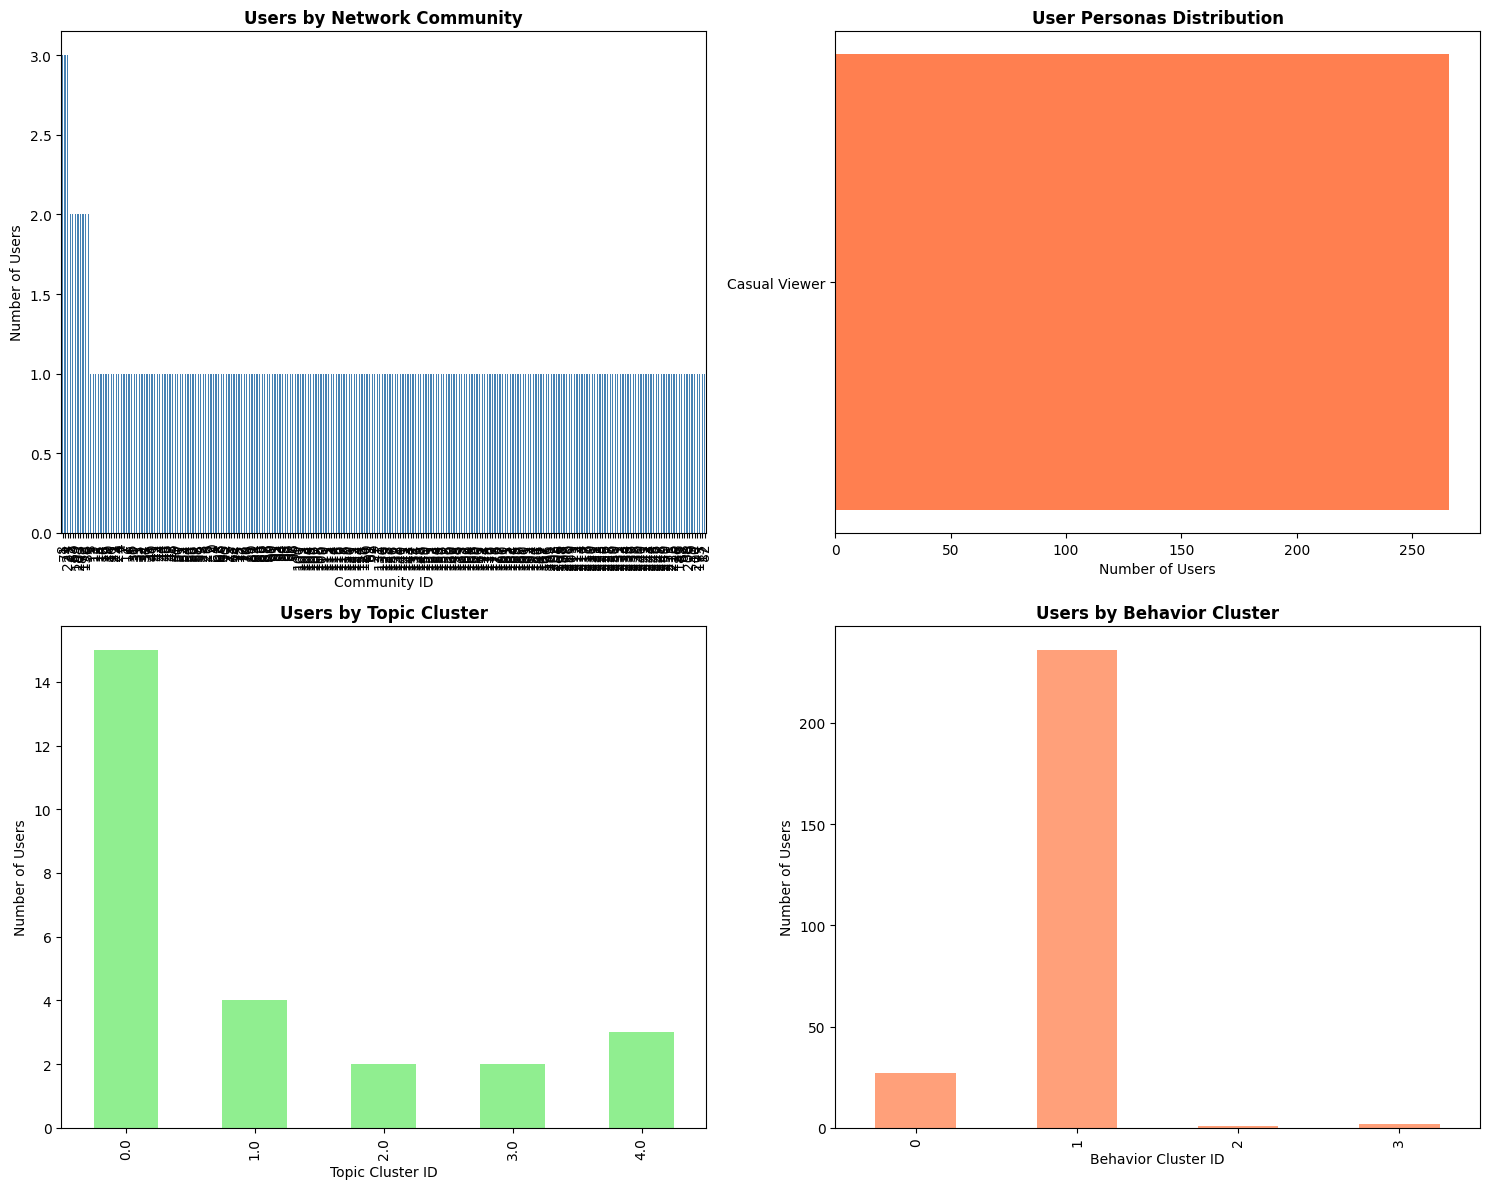

✓ Saved: viz_01_cluster_distribution.png


In [ ]:
# Visualization 1: Cluster Distribution and Persona Analysis
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Network Community Distribution
df_users['network_community'].value_counts().plot(kind='bar', ax=axes[0, 0], color='steelblue')
axes[0, 0].set_title('Users by Network Community', fontsize=12, fontweight='bold')
axes[0, 0].set_xlabel('Community ID')
axes[0, 0].set_ylabel('Number of Users')

# Persona Distribution
persona_counts = df_users['persona'].value_counts()
axes[0, 1].barh(persona_counts.index, persona_counts.values, color='coral')
axes[0, 1].set_title('User Personas Distribution', fontsize=12, fontweight='bold')
axes[0, 1].set_xlabel('Number of Users')

# Topic Cluster Distribution
df_users['topic_cluster'].value_counts().sort_index().plot(kind='bar', ax=axes[1, 0], color='lightgreen')
axes[1, 0].set_title('Users by Topic Cluster', fontsize=12, fontweight='bold')
axes[1, 0].set_xlabel('Topic Cluster ID')
axes[1, 0].set_ylabel('Number of Users')

# Behavior Cluster Distribution
df_users['behavior_cluster'].value_counts().sort_index().plot(kind='bar', ax=axes[1, 1], color='lightsalmon')
axes[1, 1].set_title('Users by Behavior Cluster', fontsize=12, fontweight='bold')
axes[1, 1].set_xlabel('Behavior Cluster ID')
axes[1, 1].set_ylabel('Number of Users')

plt.tight_layout()
plt.savefig(f'{output_dir}/viz_01_cluster_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

print("✓ Saved: viz_01_cluster_distribution.png")


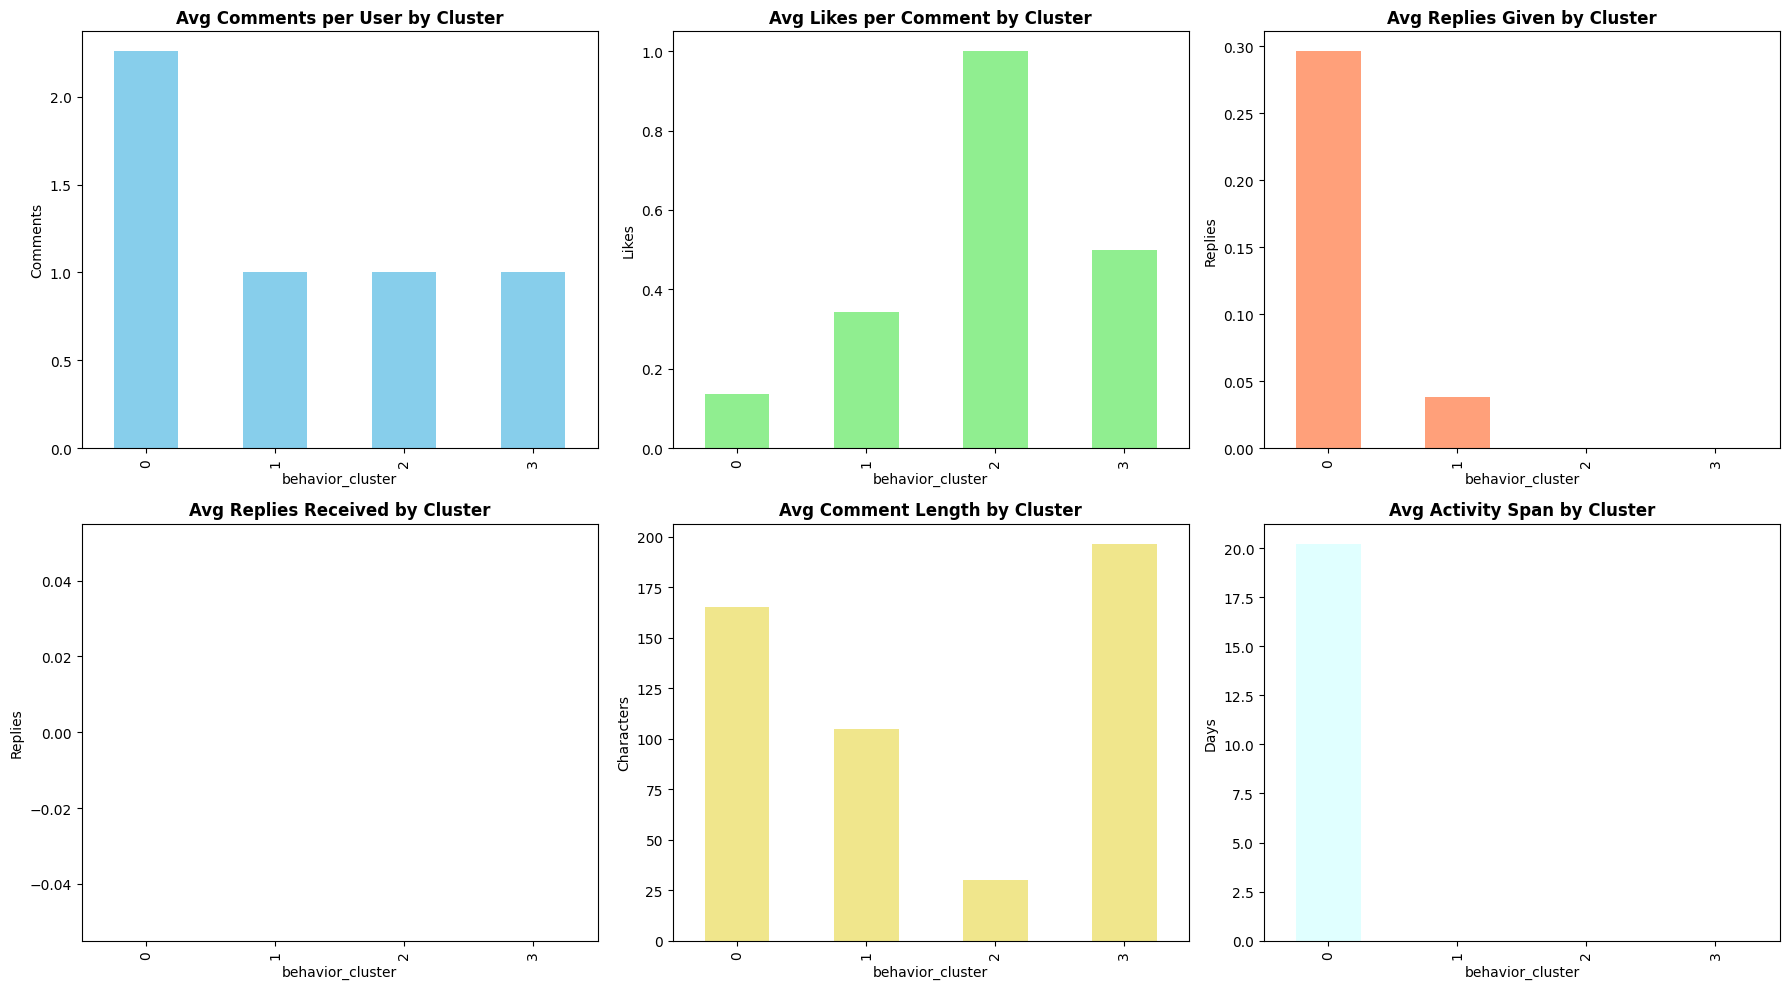

✓ Saved: viz_02_behavioral_metrics.png


In [ ]:
# Visualization 2: Behavioral Metrics by Cluster
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

# Total Comments
df_behavior.groupby('behavior_cluster')['total_comments'].mean().plot(kind='bar', ax=axes[0, 0], color='skyblue')
axes[0, 0].set_title('Avg Comments per User by Cluster', fontweight='bold')
axes[0, 0].set_ylabel('Comments')

# Average Likes
df_behavior.groupby('behavior_cluster')['avg_likes'].mean().plot(kind='bar', ax=axes[0, 1], color='lightgreen')
axes[0, 1].set_title('Avg Likes per Comment by Cluster', fontweight='bold')
axes[0, 1].set_ylabel('Likes')

# Replies Given
df_behavior.groupby('behavior_cluster')['replies_given'].mean().plot(kind='bar', ax=axes[0, 2], color='lightsalmon')
axes[0, 2].set_title('Avg Replies Given by Cluster', fontweight='bold')
axes[0, 2].set_ylabel('Replies')

# Replies Received
df_behavior.groupby('behavior_cluster')['replies_received'].mean().plot(kind='bar', ax=axes[1, 0], color='plum')
axes[1, 0].set_title('Avg Replies Received by Cluster', fontweight='bold')
axes[1, 0].set_ylabel('Replies')

# Comment Length
df_behavior.groupby('behavior_cluster')['avg_comment_length'].mean().plot(kind='bar', ax=axes[1, 1], color='khaki')
axes[1, 1].set_title('Avg Comment Length by Cluster', fontweight='bold')
axes[1, 1].set_ylabel('Characters')

# Activity Span
df_behavior.groupby('behavior_cluster')['activity_span_days'].mean().plot(kind='bar', ax=axes[1, 2], color='lightcyan')
axes[1, 2].set_title('Avg Activity Span by Cluster', fontweight='bold')
axes[1, 2].set_ylabel('Days')

plt.tight_layout()
plt.savefig(f'{output_dir}/viz_02_behavioral_metrics.png', dpi=300, bbox_inches='tight')
plt.show()

print("✓ Saved: viz_02_behavioral_metrics.png")


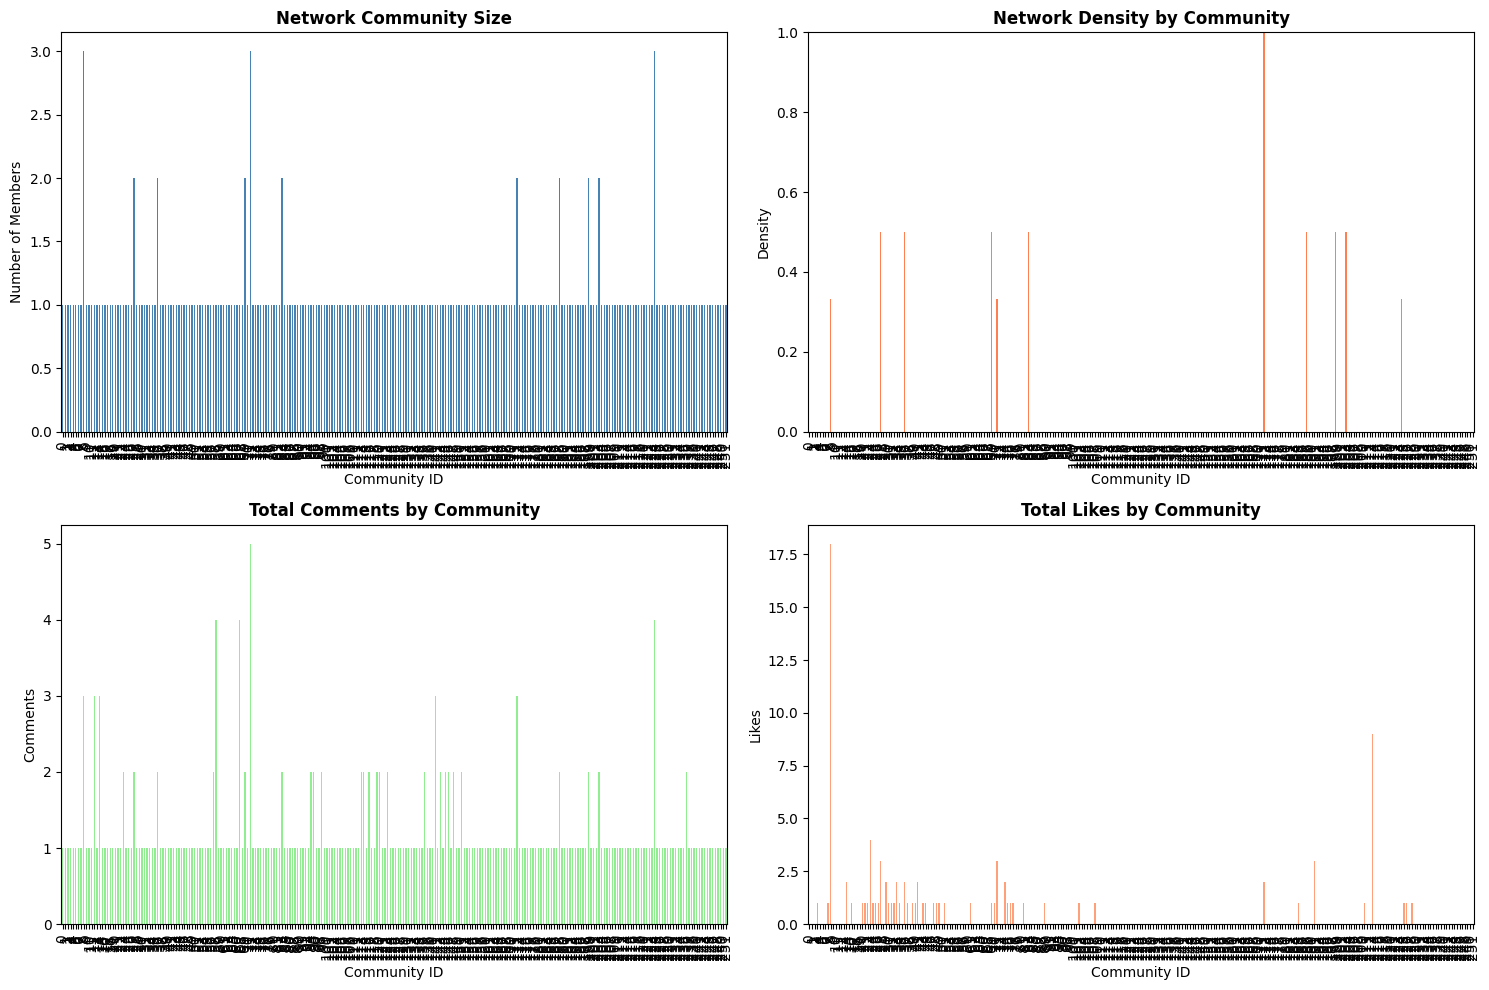

✓ Saved: viz_03_community_statistics.png


In [ ]:
# Visualization 3: Community Statistics
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Community Size
df_community_stats['size'].plot(kind='bar', ax=axes[0, 0], color='steelblue')
axes[0, 0].set_title('Network Community Size', fontweight='bold')
axes[0, 0].set_xlabel('Community ID')
axes[0, 0].set_ylabel('Number of Members')

# Community Density
df_community_stats['density'].plot(kind='bar', ax=axes[0, 1], color='coral')
axes[0, 1].set_title('Network Density by Community', fontweight='bold')
axes[0, 1].set_xlabel('Community ID')
axes[0, 1].set_ylabel('Density')
axes[0, 1].set_ylim([0, 1])

# Total Comments per Community
df_community_stats['total_comments'].plot(kind='bar', ax=axes[1, 0], color='lightgreen')
axes[1, 0].set_title('Total Comments by Community', fontweight='bold')
axes[1, 0].set_xlabel('Community ID')
axes[1, 0].set_ylabel('Comments')

# Total Likes per Community
df_community_stats['total_likes'].plot(kind='bar', ax=axes[1, 1], color='lightsalmon')
axes[1, 1].set_title('Total Likes by Community', fontweight='bold')
axes[1, 1].set_xlabel('Community ID')
axes[1, 1].set_ylabel('Likes')

plt.tight_layout()
plt.savefig(f'{output_dir}/viz_03_community_statistics.png', dpi=300, bbox_inches='tight')
plt.show()

print("✓ Saved: viz_03_community_statistics.png")


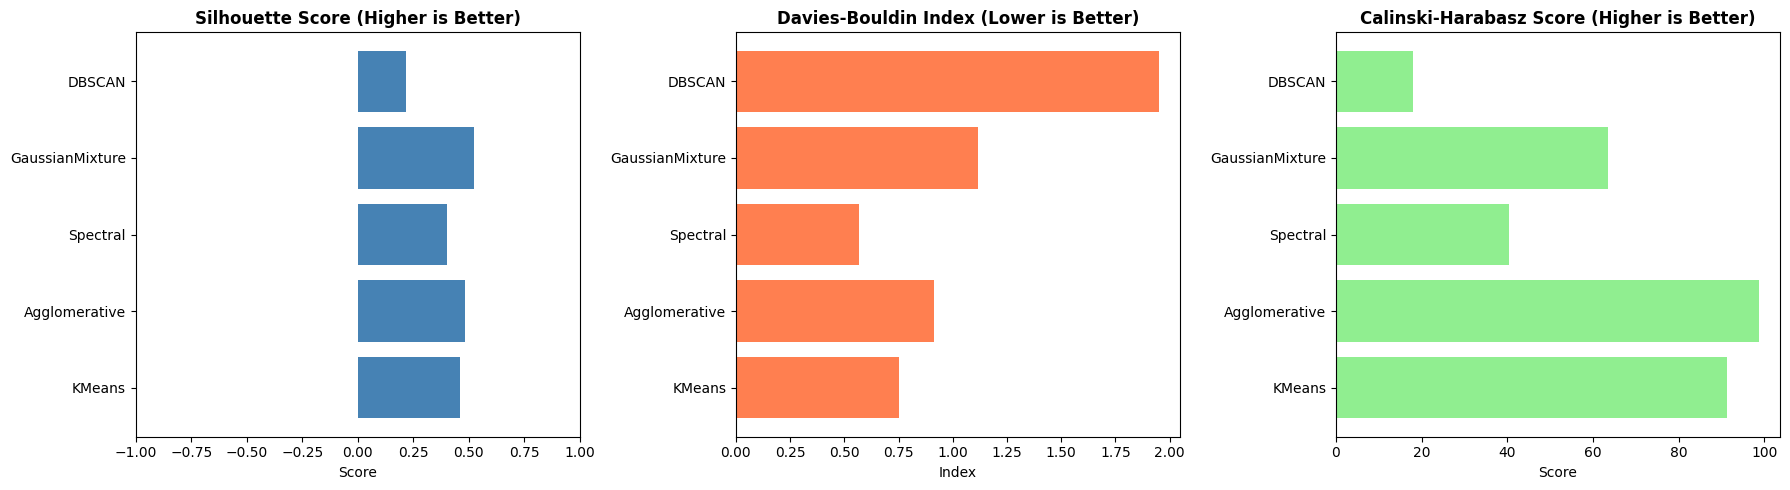

✓ Saved: viz_04_algorithm_comparison.png


In [ ]:
# Visualization 4: Clustering Algorithm Comparison
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Filter out error rows
algo_data = df_algo_comp.dropna(subset=['Silhouette_Score'])

# Silhouette Score Comparison
axes[0].barh(algo_data['Algorithm'], algo_data['Silhouette_Score'], color='steelblue')
axes[0].set_title('Silhouette Score (Higher is Better)', fontweight='bold')
axes[0].set_xlabel('Score')
axes[0].set_xlim([-1, 1])

# Davies-Bouldin Index (Lower is Better)
axes[1].barh(algo_data['Algorithm'], algo_data['Davies_Bouldin_Index'], color='coral')
axes[1].set_title('Davies-Bouldin Index (Lower is Better)', fontweight='bold')
axes[1].set_xlabel('Index')

# Calinski-Harabasz Score (Higher is Better)
axes[2].barh(algo_data['Algorithm'], algo_data['Calinski_Harabasz_Score'], color='lightgreen')
axes[2].set_title('Calinski-Harabasz Score (Higher is Better)', fontweight='bold')
axes[2].set_xlabel('Score')

plt.tight_layout()
plt.savefig(f'{output_dir}/viz_04_algorithm_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

print("✓ Saved: viz_04_algorithm_comparison.png")


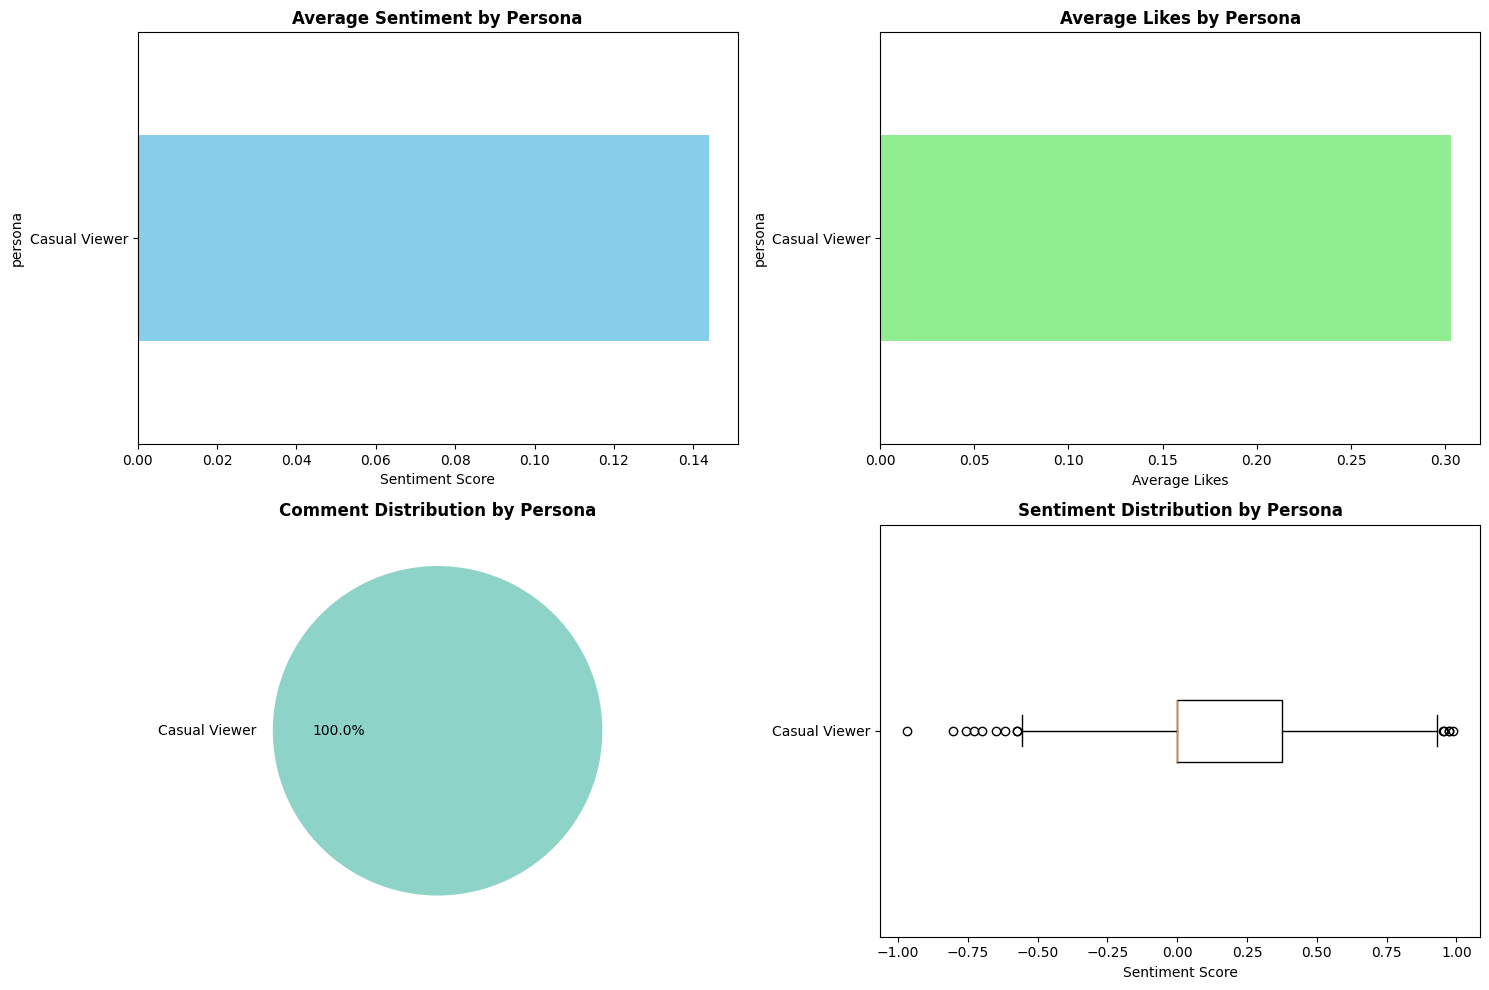

✓ Saved: viz_05_persona_analysis.png


In [ ]:
# Visualization 5: Sentiment and Engagement Analysis by Persona
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Average Sentiment by Persona
sentiment_by_persona = df_full.groupby('persona')['sentiment_vader_compound'].mean().sort_values()
sentiment_by_persona.plot(kind='barh', ax=axes[0, 0], color='skyblue')
axes[0, 0].set_title('Average Sentiment by Persona', fontweight='bold')
axes[0, 0].set_xlabel('Sentiment Score')

# Engagement (Likes) by Persona
engagement_by_persona = df_full.groupby('persona')['like_count'].mean().sort_values()
engagement_by_persona.plot(kind='barh', ax=axes[0, 1], color='lightgreen')
axes[0, 1].set_title('Average Likes by Persona', fontweight='bold')
axes[0, 1].set_xlabel('Average Likes')

# Comment Count Distribution by Persona
persona_comment_counts = df_full.groupby('persona')['comment_id'].count()
axes[1, 0].pie(persona_comment_counts.values, labels=persona_comment_counts.index, autopct='%1.1f%%', colors=plt.cm.Set3(range(len(persona_comment_counts))))
axes[1, 0].set_title('Comment Distribution by Persona', fontweight='bold')

# Sentiment Distribution by Persona (Box Plot)
sentiments = [df_full[df_full['persona'] == p]['sentiment_vader_compound'].values for p in df_full['persona'].unique()]
axes[1, 1].boxplot(sentiments, labels=df_full['persona'].unique(), vert=False)
axes[1, 1].set_title('Sentiment Distribution by Persona', fontweight='bold')
axes[1, 1].set_xlabel('Sentiment Score')

plt.tight_layout()
plt.savefig(f'{output_dir}/viz_05_persona_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

print("✓ Saved: viz_05_persona_analysis.png")


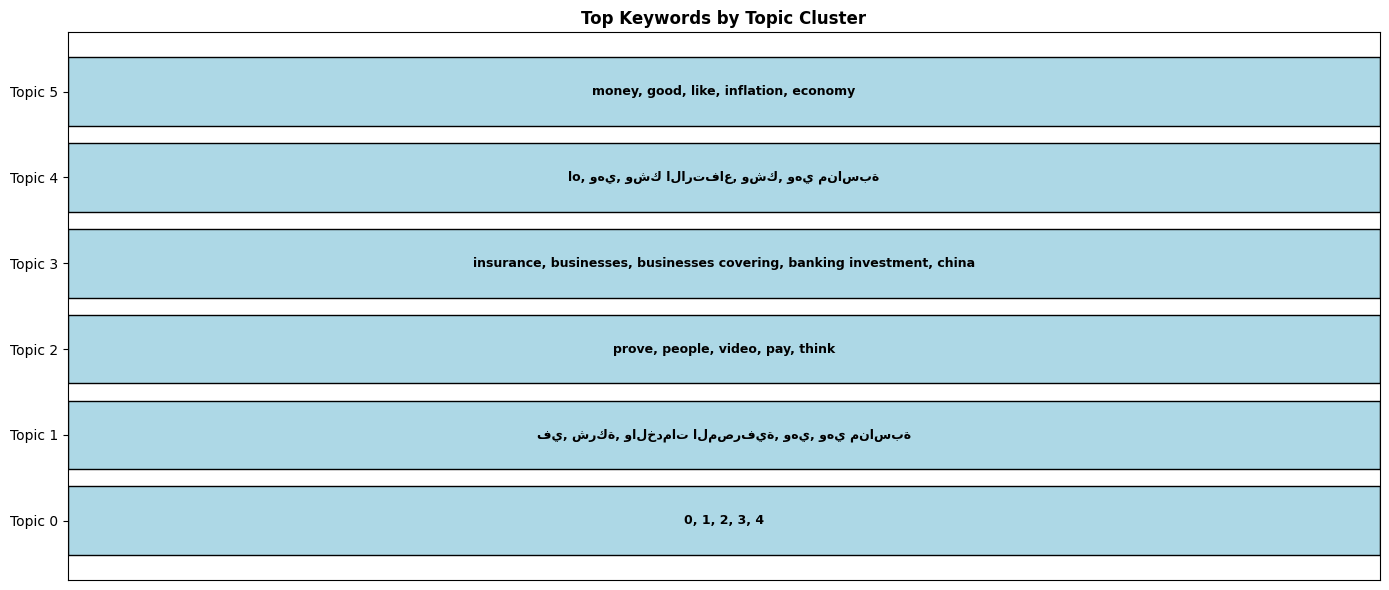

✓ Saved: viz_06_topic_keywords.png

Topic Keywords Summary:
Topic 0: 0, 1, 2, 3, 4
Topic 1: في, شركة, والخدمات المصرفية, وهي, وهي مناسبة
Topic 2: prove, people, video, pay, think
Topic 3: insurance, businesses, businesses covering, banking investment, china
Topic 4: lo, وهي, وشك الارتفاع, وشك, وهي مناسبة
Topic 5: money, good, like, inflation, economy


In [ ]:
# Visualization 6: Topic Cluster Analysis - Top Terms Heatmap
# Prepare topic terms data for heatmap
topic_data = df_topic_terms.fillna('')

fig, ax = plt.subplots(figsize=(14, 6))

# Create a visual representation of topic terms
topic_summary = []
for col in topic_data.columns:
    terms = [str(t) for t in topic_data[col].dropna().values[:5]]  # Get top 5 terms
    topic_summary.append(', '.join(terms))

y_pos = range(len(topic_summary))
ax.barh(y_pos, [1]*len(topic_summary), color='lightblue', edgecolor='black')

for i, (idx, terms) in enumerate(enumerate(topic_summary)):
    ax.text(0.5, i, terms, va='center', ha='center', fontsize=9, fontweight='bold', wrap=True)

ax.set_yticks(y_pos)
ax.set_yticklabels([f'Topic {i}' for i in range(len(topic_summary))])
ax.set_xlim(0, 1)
ax.set_xticks([])
ax.set_title('Top Keywords by Topic Cluster', fontweight='bold', fontsize=12)

plt.tight_layout()
plt.savefig(f'{output_dir}/viz_06_topic_keywords.png', dpi=300, bbox_inches='tight')
plt.show()

print("✓ Saved: viz_06_topic_keywords.png")
print("\nTopic Keywords Summary:")
for i, terms in enumerate(topic_summary):
    print(f"Topic {i}: {terms}")


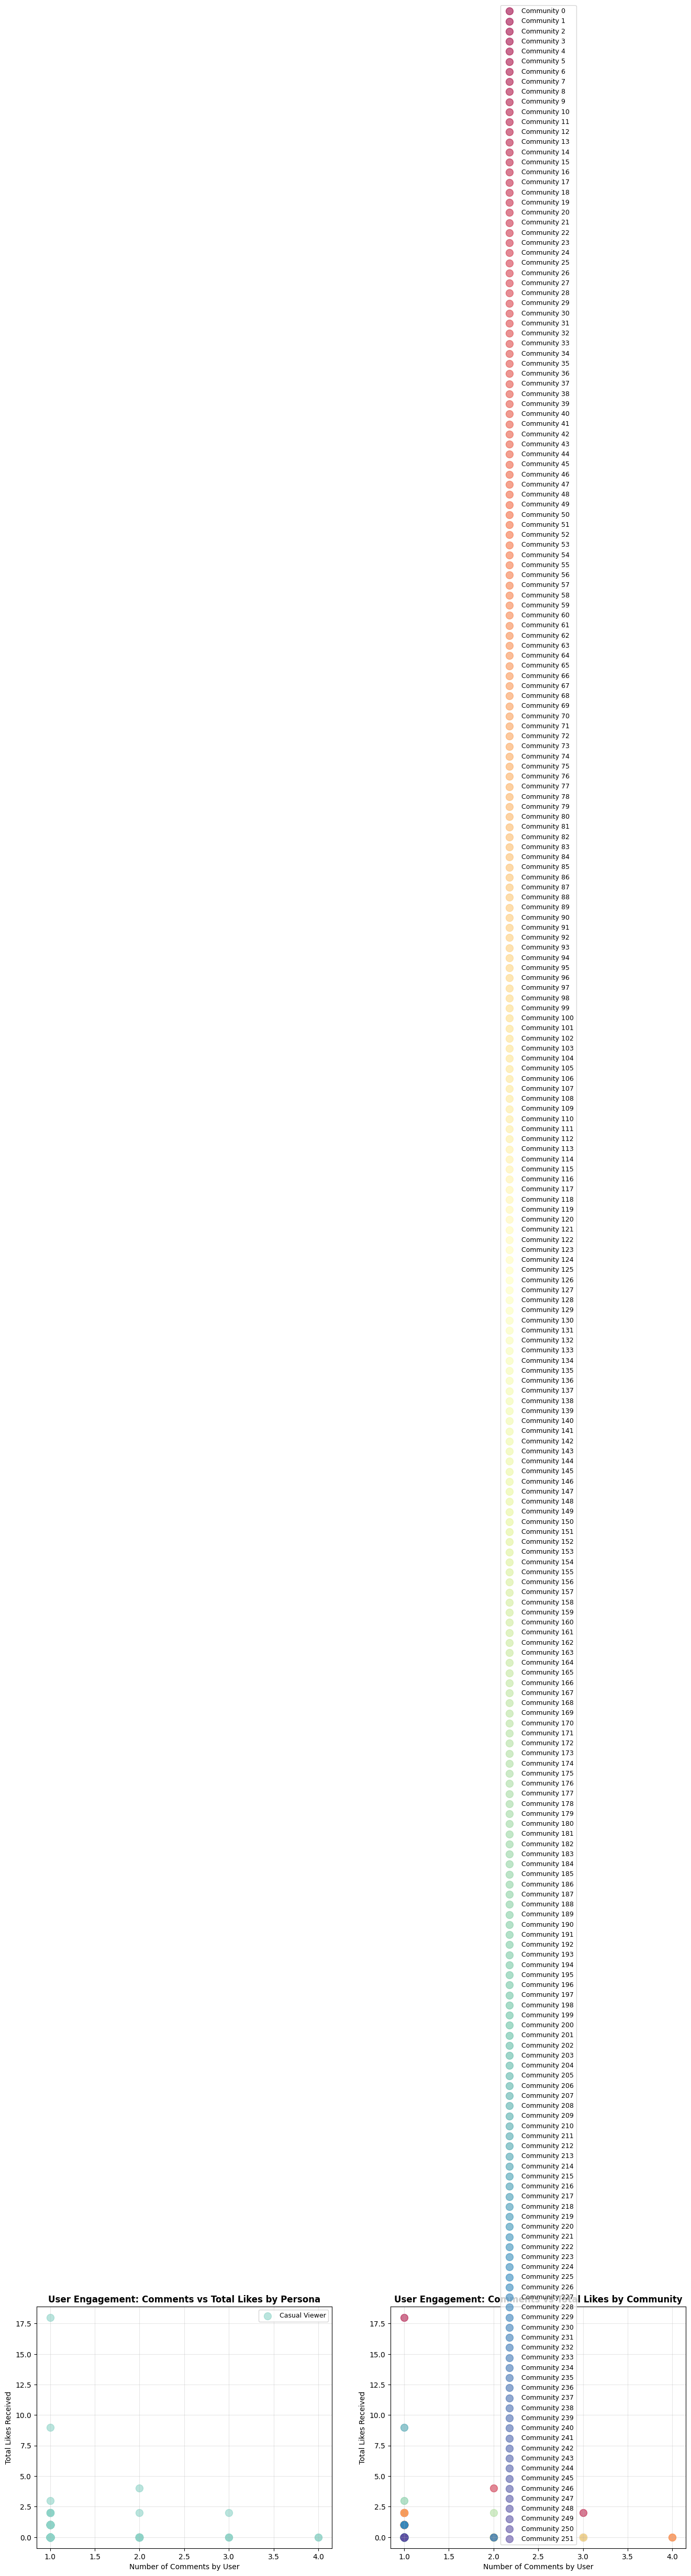

✓ Saved: viz_07_engagement_scatter.png


In [ ]:
# Visualization 7: Scatter Plot - Comments vs Likes by Persona and Community
# NOTE: Community detection now uses resolution and min_community_size parameters to reduce fragmentation
# - Lower resolution (e.g., 0.3) = fewer, larger communities
# - Higher min_community_size (e.g., 5-10) = merges very small communities into larger ones
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Scatter by Persona - Aggregated by User
personas = sorted(df_full['persona'].dropna().unique())
colors = plt.cm.Set3(range(len(personas)))
persona_color_map = {p: c for p, c in zip(personas, colors)}

for persona in personas:
    data = df_full[df_full['persona'] == persona]
    user_stats = data.groupby('author_channel_id').agg({
        'comment_id': 'count',
        'like_count': 'sum'
    }).reset_index()
    user_stats.columns = ['author_channel_id', 'comment_count', 'total_likes']

    axes[0].scatter(user_stats['comment_count'],
                   user_stats['total_likes'],
                   label=persona, alpha=0.6, s=100, color=persona_color_map[persona])

axes[0].set_title('User Engagement: Comments vs Total Likes by Persona', fontweight='bold')
axes[0].set_xlabel('Number of Comments by User')
axes[0].set_ylabel('Total Likes Received')
axes[0].legend(fontsize=9)
axes[0].grid(True, alpha=0.3)

# Scatter by Community
communities = sorted(df_full['network_community'].dropna().unique())
colors2 = plt.cm.Spectral(np.linspace(0, 1, len(communities)))
community_color_map = {c: col for c, col in zip(communities, colors2)}

for community in communities:
    data = df_full[df_full['network_community'] == community]
    user_stats = data.groupby('author_channel_id').agg({
        'comment_id': 'count',
        'like_count': 'sum'
    }).reset_index()
    user_stats.columns = ['author_channel_id', 'comment_count', 'total_likes']

    axes[1].scatter(user_stats['comment_count'], user_stats['total_likes'],
                   label=f'Community {int(community)}', alpha=0.6, s=100,
                   color=community_color_map[community])

axes[1].set_title('User Engagement: Comments vs Total Likes by Community', fontweight='bold')
axes[1].set_xlabel('Number of Comments by User')
axes[1].set_ylabel('Total Likes Received')
axes[1].legend(fontsize=9)
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig(f'{output_dir}/viz_07_engagement_scatter.png', dpi=300, bbox_inches='tight')
plt.show()

print("✓ Saved: viz_07_engagement_scatter.png")

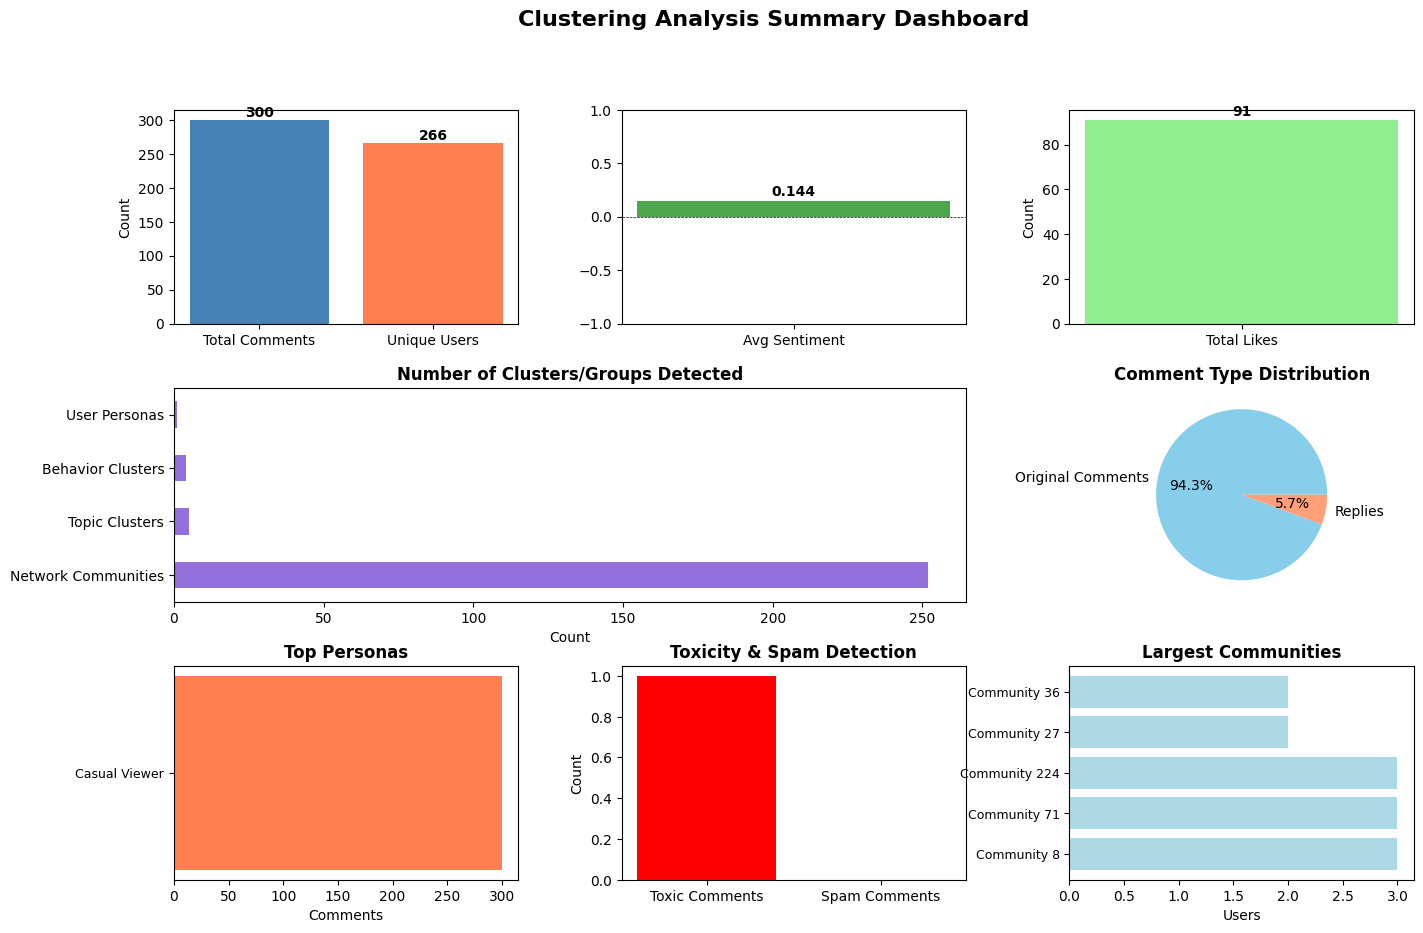

✓ Saved: viz_08_summary_dashboard.png


In [ ]:
# Visualization 8: Summary Statistics Dashboard
fig = plt.figure(figsize=(16, 10))
gs = fig.add_gridspec(3, 3, hspace=0.3, wspace=0.3)

# Title
fig.suptitle('Clustering Analysis Summary Dashboard', fontsize=16, fontweight='bold', y=0.98)

# 1. Total Comments and Users
ax1 = fig.add_subplot(gs[0, 0])
stats = [len(df_full), df_full['author_channel_id'].nunique()]
ax1.bar(['Total Comments', 'Unique Users'], stats, color=['steelblue', 'coral'])
ax1.set_ylabel('Count')
for i, v in enumerate(stats):
    ax1.text(i, v + 5, str(v), ha='center', fontweight='bold')

# 2. Average Sentiment
ax2 = fig.add_subplot(gs[0, 1])
avg_sentiment = df_full['sentiment_vader_compound'].mean()
color = 'green' if avg_sentiment > 0 else 'red'
ax2.bar(['Avg Sentiment'], [avg_sentiment], color=color, alpha=0.7)
ax2.set_ylim([-1, 1])
ax2.axhline(y=0, color='black', linestyle='--', linewidth=0.5)
ax2.text(0, avg_sentiment + 0.05, f'{avg_sentiment:.3f}', ha='center', fontweight='bold')

# 3. Total Likes
ax3 = fig.add_subplot(gs[0, 2])
total_likes = df_full['like_count'].sum()
ax3.bar(['Total Likes'], [total_likes], color='lightgreen')
ax3.set_ylabel('Count')
ax3.text(0, total_likes + total_likes*0.02, f'{int(total_likes)}', ha='center', fontweight='bold')

# 4. Cluster Counts
ax4 = fig.add_subplot(gs[1, :2])
cluster_counts = pd.DataFrame({
    'Network Communities': [len(df_full['network_community'].unique())],
    'Topic Clusters': [int(df_full['topic_cluster'].max() + 1)],
    'Behavior Clusters': [int(df_full['behavior_cluster'].max() + 1)],
    'User Personas': [df_full['persona'].nunique()]
})
cluster_counts.T[0].plot(kind='barh', ax=ax4, color='mediumpurple')
ax4.set_xlabel('Count')
ax4.set_title('Number of Clusters/Groups Detected', fontweight='bold')

# 5. Comment Type Distribution
ax5 = fig.add_subplot(gs[1, 2])
comment_types = df_full['is_reply'].value_counts()
ax5.pie([comment_types[False], comment_types[True]], labels=['Original Comments', 'Replies'],
        autopct='%1.1f%%', colors=['skyblue', 'lightsalmon'])
ax5.set_title('Comment Type Distribution', fontweight='bold')

# 6. Top 5 Personas
ax6 = fig.add_subplot(gs[2, 0])
top_personas = df_full.groupby('persona')['comment_id'].count().nlargest(5)
ax6.barh(range(len(top_personas)), top_personas.values, color='coral')
ax6.set_yticks(range(len(top_personas)))
ax6.set_yticklabels(top_personas.index, fontsize=9)
ax6.set_xlabel('Comments')
ax6.set_title('Top Personas', fontweight='bold')

# 7. Toxicity Summary
ax7 = fig.add_subplot(gs[2, 1])
toxic_count = df_full['is_toxic'].sum()
spam_count = df_full['is_spam'].sum()
ax7.bar(['Toxic Comments', 'Spam Comments'], [toxic_count, spam_count], color=['red', 'orange'])
ax7.set_ylabel('Count')
ax7.set_title('Toxicity & Spam Detection', fontweight='bold')

# 8. Top Communities
ax8 = fig.add_subplot(gs[2, 2])
top_communities = df_full.groupby('network_community')['author_channel_id'].nunique().nlargest(5)
ax8.barh(range(len(top_communities)), top_communities.values, color='lightblue')
ax8.set_yticks(range(len(top_communities)))
ax8.set_yticklabels([f'Community {int(c)}' for c in top_communities.index], fontsize=9)
ax8.set_xlabel('Users')
ax8.set_title('Largest Communities', fontweight='bold')

plt.savefig(f'{output_dir}/viz_08_summary_dashboard.png', dpi=300, bbox_inches='tight')
plt.show()

print("✓ Saved: viz_08_summary_dashboard.png")


In [ ]:
# Summary: All Visualizations Created
print("=" * 80)
print("VISUALIZATION SUMMARY")
print("=" * 80)

visualizations = [
    "viz_01_cluster_distribution.png - Distribution of users across different clusters",
    "viz_02_behavioral_metrics.png - Behavioral metrics comparison across clusters",
    "viz_03_community_statistics.png - Network community statistics and metrics",
    "viz_04_algorithm_comparison.png - Clustering algorithm performance comparison",
    "viz_05_persona_analysis.png - Sentiment and engagement analysis by user personas",
    "viz_06_topic_keywords.png - Top keywords for each topic cluster",
    "viz_07_engagement_scatter.png - User engagement patterns by persona and community",
    "viz_08_summary_dashboard.png - Overall statistics and summary dashboard"
]

for i, viz in enumerate(visualizations, 1):
    print(f"\n{i}. {viz}")

print("\n" + "=" * 80)
print(f"All visualizations saved to: {output_dir}/")
print("=" * 80)

# Generate summary statistics
print("\nKEY STATISTICS:")
print(f"  Total Comments: {len(df_full)}")
print(f"  Unique Users: {df_full['author_channel_id'].nunique()}")
print(f"  Total Likes: {df_full['like_count'].sum()}")
print(f"  Average Sentiment: {df_full['sentiment_vader_compound'].mean():.3f}")
print(f"  Toxic Comments: {df_full['is_toxic'].sum()} ({df_full['is_toxic'].sum()/len(df_full)*100:.1f}%)")
print(f"  Spam Comments: {df_full['is_spam'].sum()} ({df_full['is_spam'].sum()/len(df_full)*100:.1f}%)")
print(f"\n  Network Communities: {int(df_full['network_community'].max()) + 1}")
print(f"  Topic Clusters: {int(df_full['topic_cluster'].max()) + 1}")
print(f"  Behavior Clusters: {int(df_full['behavior_cluster'].max()) + 1}")
print(f"  User Personas: {df_full['persona'].nunique()}")


VISUALIZATION SUMMARY

1. viz_01_cluster_distribution.png - Distribution of users across different clusters

2. viz_02_behavioral_metrics.png - Behavioral metrics comparison across clusters

3. viz_03_community_statistics.png - Network community statistics and metrics

4. viz_04_algorithm_comparison.png - Clustering algorithm performance comparison

5. viz_05_persona_analysis.png - Sentiment and engagement analysis by user personas

6. viz_06_topic_keywords.png - Top keywords for each topic cluster

7. viz_07_engagement_scatter.png - User engagement patterns by persona and community

8. viz_08_summary_dashboard.png - Overall statistics and summary dashboard

All visualizations saved to: cluster_results/

KEY STATISTICS:
  Total Comments: 300
  Unique Users: 266
  Total Likes: 91
  Average Sentiment: 0.144
  Toxic Comments: 1 (0.3%)
  Spam Comments: 0 (0.0%)

  Network Communities: 252
  Topic Clusters: 5
  Behavior Clusters: 4
  User Personas: 1
